このコードは、Pythonのパッケージ管理ツール `pip` を使って、以下の3つのライブラリをインストールするコマンドです。

```
!pip install chembl-webresource-client pandas matplotlib
```

## 1. `!` の意味
- `!` はJupyter Notebook や Google Colab などの環境で、シェルコマンドを実行するために使われます。
- 通常のPythonスクリプト (`.py` ファイル) では `!` は不要です。

## 2. インストールされるライブラリ
### ① `chembl-webresource-client`
- **ChEMBLデータベース** へアクセスするためのPythonクライアントです。
- **ChEMBL** は、生物活性化合物に関する大規模なデータベースで、薬理学的な研究や創薬のために利用されます。
- このライブラリを使うと、APIを通じてChEMBLのデータを取得できます。

### ② `pandas`
- **データ解析用のライブラリ** で、表形式のデータ（DataFrame）を扱うのに便利です。
- CSVファイルやデータベースのデータを読み込んだり、データの整形や統計処理を行ったりできます。

### ③ `matplotlib`
- **データの可視化ライブラリ** で、グラフやヒストグラムを作成するのに使用されます。
- 科学データや統計データを視覚的に分析する際に役立ちます。

## 3. 実行後の動作
このコマンドを実行すると、指定されたライブラリがPython環境にインストールされます。  
すでにインストールされている場合は、スキップされるか、最新バージョンに更新されます。

### 補足：
- インストール後、ライブラリを使用するには `import` 文を使います。
  ```python
  import chembl_webresource_client
  import pandas as pd
  import matplotlib.pyplot as plt
  ```
- Jupyter NotebookやGoogle Colabを使用している場合、`!pip install` の代わりに `pip install` でも動作します。

このコードは、主に**創薬・化学データ分析** に関係するプロジェクトで使われることが多いです。

In [2]:
!pip install chembl-webresource-client pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 4.8 MB/s eta 0:00:00


このコードは **ChEMBLデータベース** から **ヒト（Homo sapiens）を標的とした化合物のIC50値** を取得し、データを処理して **pandasのDataFrame** に変換するものです。以下に詳しく解説します。

---

## 1. ライブラリのインポート
```python
import pandas as pd
import matplotlib.pyplot as plt
from chembl_webresource_client.new_client import new_client
```
- `pandas`：データ分析ライブラリ（表形式データを扱う）
- `matplotlib.pyplot`：データ可視化ライブラリ（今回は使用されていない）
- `chembl_webresource_client.new_client`：**ChEMBLデータベース** からデータを取得するためのクライアント

---

## 2. ChEMBL API から活性データを取得
```python
# Target and activity clients
activity = new_client.activity
```
- **ChEMBLの "activity" クライアント** を作成  
  → これは化合物の生物活性データ（例：IC50、Ki、Kd など）を取得するためのもの。

```python
# Fetch activities where target_organism is Homo sapiens and IC50 is reported
res = activity.filter(target_organism="Homo sapiens", standard_type="IC50").only(
    ["molecule_chembl_id", "target_chembl_id", "standard_value"]
)[:2000]
```
- `activity.filter(target_organism="Homo sapiens", standard_type="IC50")`
  - **標的がヒト（Homo sapiens）である**
  - **IC50（半数阻害濃度）のデータがある**
  - IC50 は、低いほど活性が強いことを意味する。

- `.only(["molecule_chembl_id", "target_chembl_id", "standard_value"])`
  - `molecule_chembl_id`（化合物のID）
  - `target_chembl_id`（標的タンパク質のID）
  - `standard_value`（IC50 の数値）

- `[:2000]`
  - 取得するデータ数を **最大2000件** に制限

---

## 3. データを pandas の DataFrame に変換
```python
df = pd.DataFrame(res)
```
- `res` はリスト形式なので、pandasの `DataFrame` に変換して扱いやすくする。

---

## 4. データの前処理（欠損値処理 & 数値変換）
```python
df = df.dropna(subset=["standard_value"]).copy()  # .copy() を追加
```
- `dropna(subset=["standard_value"])`
  - **IC50 値（standard_value）が欠損している行を削除**
- `.copy()` を追加
  - `SettingWithCopyWarning` を防ぐために、新しい DataFrame を明示的に作成

```python
df.loc[:, "standard_value"] = pd.to_numeric(df["standard_value"], errors="coerce")
```
- `pd.to_numeric(df["standard_value"], errors="coerce")`
  - **IC50 値を数値型（float）に変換**
  - `errors="coerce"` を指定 → **変換できないデータ（文字列など）は NaN にする**

---

## 5. DataFrame の表示
```python
df
```
- **処理後のデータを表示**

---

## **このコードの目的**
1. **ChEMBLデータベースから、ヒト（Homo sapiens）の IC50 値が報告されている化合物を取得**
2. **取得データを pandas の DataFrame に変換**
3. **欠損データを処理し、IC50 値を数値型に変換**
4. **最終的なデータを DataFrame として表示**

---

## **追加できる改善点**
### ① `standard_value` の単位の統一
- IC50 は `nM`（ナノモル）単位で記録されることが多いが、データによっては異なる可能性がある。
- 必要に応じて `logIC50`（対数変換）することで、分布を正規化しやすくなる。
  ```python
  df["log_IC50"] = df["standard_value"].apply(lambda x: np.log10(x) if x > 0 else np.nan)
  ```

### ② ヒストグラムの描画
- `matplotlib` を活用して IC50 値の分布を可視化できる。
  ```python
  plt.hist(df["standard_value"].dropna(), bins=50, color="blue", alpha=0.7)
  plt.xlabel("IC50 (nM)")
  plt.ylabel("Frequency")
  plt.title("Distribution of IC50 Values")
  plt.show()
  ```

このコードは **創薬研究** において **標的タンパク質に対する化合物の活性評価** に役立つ基本的なデータ処理を行っています。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from chembl_webresource_client.new_client import new_client

# Target and activity clients
activity = new_client.activity

# Fetch activities where target_organism is Homo sapiens and IC50 is reported
res = activity.filter(target_organism="Homo sapiens", standard_type="IC50").only(
    ["molecule_chembl_id", "target_chembl_id", "standard_value"]
)[:2000]

# Convert to DataFrame
df = pd.DataFrame(res)

# Remove missing values and convert IC50 values to numeric
df = df.dropna(subset=["standard_value"]).copy()  # .copy() を追加
df.loc[:, "standard_value"] = pd.to_numeric(df["standard_value"], errors="coerce")

df

molecule_chembl_id standard_value target_chembl_id   value
0          CHEMBL113081       100000.0       CHEMBL1806   100.0
1          CHEMBL324340         2500.0       CHEMBL3921     2.5
2          CHEMBL109600         9000.0       CHEMBL3921     9.0
3          CHEMBL152968         6000.0       CHEMBL3356     6.0
4          CHEMBL152968        37000.0        CHEMBL340    37.0
...                 ...            ...              ...     ...
1995       CHEMBL312429          368.0        CHEMBL332   368.0
1996       CHEMBL312429            5.0        CHEMBL321     5.0
1997       CHEMBL312429            2.0        CHEMBL280     2.0
1998       CHEMBL312429          170.0       CHEMBL3706   170.0
1999        CHEMBL78549         1720.0        CHEMBL332  1720.0

[1941 rows x 4 columns]

このコードは **pandas を使って、各標的タンパク質（`target_chembl_id`）の出現頻度を集計** するものです。詳しく解説します。

---

## **1. コードの解説**
```python
# Count frequency of each target_chembl_id
target_counts = df["target_chembl_id"].value_counts()
target_counts
```

### **(1) `df["target_chembl_id"].value_counts()`**
- `df["target_chembl_id"]`：  
  - `df` は ChEMBL から取得したデータを含む pandas の DataFrame。
  - `target_chembl_id` は、標的となるタンパク質の ChEMBL ID（例: `CHEMBL1234` など）。
  
- `.value_counts()`：  
  - **各`target_chembl_id` の出現回数を集計**。
  - 結果は **出現回数の降順** にソートされる。

  **例:**  
  ```plaintext
  CHEMBL204  250
  CHEMBL345  180
  CHEMBL789  120
  ```
  - `CHEMBL204` のデータが 250 件
  - `CHEMBL345` のデータが 180 件
  - `CHEMBL789` のデータが 120 件

---

## **2. 実行後のデータ構造**
- `target_counts` は **pandas の Series** で、インデックスに `target_chembl_id`、値に出現回数が格納される。
- `target_counts.head(10)` を使うと、上位 10 個のターゲットを表示できる。

---

## **3. 可視化（ヒストグラムや棒グラフ）**
データの分布を確認するために、`matplotlib` を使って可視化できます。

### **(1) 上位 10 ターゲットの棒グラフ**
```python
import matplotlib.pyplot as plt

# 上位10ターゲットを取得
top_targets = target_counts.head(10)

# 棒グラフの描画
plt.figure(figsize=(10, 5))
top_targets.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Target ChEMBL ID")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequent Targets")
plt.xticks(rotation=45)
plt.show()
```
🔹 **解説:**
- `.plot(kind="bar")` で棒グラフを描画
- `color="skyblue"` でバーの色を設定
- `plt.xticks(rotation=45)` でラベルを回転し、見やすくする

### **(2) 頻度分布のヒストグラム**
```python
plt.figure(figsize=(8, 5))
plt.hist(target_counts, bins=50, color="blue", alpha=0.7)
plt.xlabel("Number of IC50 Records per Target")
plt.ylabel("Frequency")
plt.title("Distribution of Target Frequencies")
plt.show()
```
🔹 **解説:**
- `plt.hist(target_counts, bins=50)`：各標的が何回データセットに出現するかの分布を可視化
- **多くの標的は少数のデータしか持たず、一部の標的が大量のデータを持つ**（ロングテール分布になりやすい）

---

## **4. 応用**
### **(1) 特定の標的のデータを抽出**
- 例えば、最も頻度の高い標的（1位）を取得する。
```python
most_common_target = target_counts.idxmax()  # 出現回数が最大のターゲットID
df_most_common = df[df["target_chembl_id"] == most_common_target]  # その標的のデータを抽出
df_most_common.head()
```

### **(2) 特定のターゲットの IC50 値の分布を確認**
```python
plt.hist(df_most_common["standard_value"].dropna(), bins=30, color="green", alpha=0.7)
plt.xlabel("IC50 (nM)")
plt.ylabel("Frequency")
plt.title(f"IC50 Distribution for {most_common_target}")
plt.show()
```
🔹 **目的:**  
特定の標的に対する化合物の IC50 値の分布をチェックし、**低い IC50 の化合物が多いかどうか** を確認できる。

---

## **5. まとめ**
✅ **このコードの役割**
- 各 **標的タンパク質の出現頻度** を集計する
- **標的ごとのデータ量** を確認し、多くのデータがあるターゲットを特定できる
- 創薬研究では、頻度が高いターゲットほど **研究が進んでいる標的** の可能性が高い

✅ **拡張**
- **棒グラフやヒストグラムで可視化**
- **頻度の高い標的を特定し、IC50 値の分布を分析**
- **ロングテール分布（少数の標的にデータが集中する）を確認**

このような分析は、**創薬ターゲットの選定やデータの偏りの確認** に役立ちます！

In [2]:
# Count frequency of each target_chembl_id
target_counts = df["target_chembl_id"].value_counts()
target_counts

target_chembl_id
CHEMBL372        136
CHEMBL3735        62
CHEMBL3890        56
CHEMBL203         54
CHEMBL3070        51
                ... 
CHEMBL4703         1
CHEMBL2803         1
CHEMBL4777         1
CHEMBL2094127      1
CHEMBL2093867      1
Name: count, Length: 181, dtype: int64

このコードは、**ChEMBL データベースを活用して、最も頻度の高い標的タンパク質（`target_chembl_id`）の情報を取得し、対応する名前（`target_name`）を付与する処理** です。  
### **コードの詳細な解説**
---
### **1. 各標的タンパク質 (`target_chembl_id`) の出現頻度を集計**
```python
# Count frequency of each target_chembl_id
target_counts = df["target_chembl_id"].value_counts().head(51)
```
- `df["target_chembl_id"].value_counts()`  
  → 各 **標的タンパク質** (`target_chembl_id`) の出現頻度をカウント
- `.head(51)`  
  → **上位 51 個** の標的のみ取得（分析対象を限定）

**出力例（`target_counts`）**
```
CHEMBL204   250
CHEMBL345   180
CHEMBL789   120
...
```
---
### **2. ChEMBL API から標的情報を取得**
```python
# Target client
target = new_client.target
```
- `new_client.target` を使用して、**ChEMBL API で標的タンパク質データを取得するクライアント** を作成。

```python
# Get target names for target_chembl_id
target_info = {tid: target.get(tid).get("pref_name", "Unknown") for tid in target_counts.index}
```
- `target.get(tid)`  
  → **ChEMBL API から標的タンパク質の情報を取得**
- `.get("pref_name", "Unknown")`  
  → **標的名 (`pref_name`) を取得**。もし取得できなければ `"Unknown"` を代入。
- `target_info` は辞書形式で `target_chembl_id` に対応する名前を格納。

**出力例（`target_info`）**
```python
{
    "CHEMBL204": "EGFR",
    "CHEMBL345": "VEGFR2",
    "CHEMBL789": "BRAF",
    ...
}
```
---
### **3. DataFrame への変換**
```python
# Convert to DataFrame
target_counts_df = target_counts.reset_index()
target_counts_df.columns = ["target_chembl_id", "frequency"]
```
- `.reset_index()`  
  → `target_counts` は `Series` なので、`DataFrame` に変換。
- `.columns = ["target_chembl_id", "frequency"]`  
  → 列名を明示的に設定。

**中間結果（`target_counts_df`）**
```
target_chembl_id    frequency
CHEMBL204           250
CHEMBL345           180
CHEMBL789           120
...
```
---
### **4. 標的名（`target_name`）を追加**
```python
target_counts_df["target_name"] = target_counts_df["target_chembl_id"].map(target_info)
```
- `.map(target_info)`  
  → `target_chembl_id` に対応する標的名を辞書 `target_info` から取得して新しい列 `"target_name"` に追加。

**最終結果（`target_counts_df`）**
```
target_chembl_id    frequency    target_name
CHEMBL204           250          EGFR
CHEMBL345           180          VEGFR2
CHEMBL789           120          BRAF
...
```
---
### **5. DataFrame の表示**
```python
# Display the updated DataFrame
display(target_counts_df)
```
- Jupyter Notebook などで見やすい形で DataFrame を表示。

---
## **このコードの目的**
✅ **ChEMBL の生物活性データから、頻度の高い標的（ターゲット）を抽出**  
✅ **ターゲットの ChEMBL ID（`target_chembl_id`）を、人が理解しやすい標的名（`target_name`）に変換**  
✅ **最終的に、標的の頻度と名前を含む DataFrame を作成し、分析を容易にする**  

---
## **応用：可視化**
上位ターゲットの出現頻度を **棒グラフ** で可視化することも可能です。

```python
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(target_counts_df["target_name"], target_counts_df["frequency"], color="skyblue")
plt.xlabel("Frequency")
plt.ylabel("Target Name")
plt.title("Top 51 Targets with Most IC50 Records")
plt.gca().invert_yaxis()  # 上から順に並べる
plt.show()
```
---
## **まとめ**
📌 **上位 51 個の標的タンパク質（target_chembl_id）を取得**  
📌 **ChEMBL API から標的の正式名称（pref_name）を取得**  
📌 **DataFrame に変換し、可視化しやすい形に整理**  
📌 **創薬ターゲットの選定や IC50 データの分析に活用可能** 🚀

In [3]:
# Count frequency of each target_chembl_id
target_counts = df["target_chembl_id"].value_counts().head(51)

# Target client
target = new_client.target

# Get target names for target_chembl_id
target_info = {tid: target.get(tid).get("pref_name", "Unknown") for tid in target_counts.index}

# Convert to DataFrame
target_counts_df = target_counts.reset_index()
target_counts_df.columns = ["target_chembl_id", "frequency"]
target_counts_df["target_name"] = target_counts_df["target_chembl_id"].map(target_info)

# Display the updated DataFrame
display(target_counts_df)

target_chembl_id  frequency                                    target_name
0         CHEMBL372        136                                   Homo sapiens
1        CHEMBL3735         62               Vascular cell adhesion protein 1
2        CHEMBL3890         56                                     Selectin E
3         CHEMBL203         54         Epidermal growth factor receptor erbB1
4        CHEMBL3070         51              Intercellular adhesion molecule-1
5        CHEMBL4426         50                      Phospholipase A2 group 1B
6         CHEMBL204         44                                       Thrombin
7         CHEMBL283         38                     Matrix metalloproteinase 3
8         CHEMBL286         38                                          Renin
9        CHEMBL4611         38                                 Complement C1r
10        CHEMBL332         32                     Matrix metalloproteinase-1
11        CHEMBL237         31                          Kappa opioid receptor
12        CHEMBL280         31                    Matrix metalloproteinase 13
13    CHEMBL2093863         30                            Phosphodiesterase 4
14        CHEMBL333         29                     Matrix metalloproteinase-2
15        CHEMBL279         29  Vascular endothelial growth factor receptor 2
16        CHEMBL382         27                                       CCRF-CEM
17        CHEMBL221         25                               Cyclooxygenase-1
18        CHEMBL230         25                               Cyclooxygenase-2
19        CHEMBL244         25                           Coagulation factor X
20       CHEMBL3102         24                      Dopamine beta-hydroxylase
21       CHEMBL3706         24                                         ADAM17
22       CHEMBL3568         23                   Nitric-oxide synthase, brain
23     CHEMBL614177         23                                         MOLT-4
24       CHEMBL4481         22               Nitric oxide synthase, inducible
25       CHEMBL2413         22                  C-C chemokine receptor type 1
26       CHEMBL3921         21                                     Heparanase
27       CHEMBL4803         21             Nitric-oxide synthase, endothelial
28        CHEMBL383         20                                          HL-60
29    CHEMBL2094125         20                            Phosphodiesterase 3
30       CHEMBL4561         19                 Neuropeptide Y receptor type 5
31        CHEMBL335         19                Protein-tyrosine phosphatase 1B
32        CHEMBL321         17                     Matrix metalloproteinase 9
33        CHEMBL258         17                    Tyrosine-protein kinase LCK
34    CHEMBL2094115         16                                 MAP kinase p38
35     CHEMBL613888         16                                            HEL
36     CHEMBL614245         15                                          THP-1
37       CHEMBL3402         15            Alkaline phosphatase placental-like
38        CHEMBL220         13                           Acetylcholinesterase
39    CHEMBL2095204         13                                        Trypsin
40       CHEMBL4073         13                     Matrix metalloproteinase 7
41        CHEMBL236         13                          Delta opioid receptor
42       CHEMBL1790         12                        Vasopressin V2 receptor
43        CHEMBL233         12                             Mu opioid receptor
44        CHEMBL209         12                                      Trypsin I
45       CHEMBL3590         12                       Hormone sensitive lipase
46       CHEMBL2061         11                      Retinoid X receptor alpha
47       CHEMBL4607         11          Angiotensin II type 2 (AT-2) receptor
48     CHEMBL614213         11                                        OVCAR-3
49       CHEMBL1785         11                       Endothelin receptor ET-B
50        CHEMBL252      

このコードは、**ChEMBL データベースから特定の標的タンパク質（`target_chembl_id`）に関連する IC50 データを取得し、Google Drive に CSV ファイルとして保存する関数** です。  

---

# **📌 コードの詳細な解説**
## **1. 必要なライブラリのインポート**
```python
import os
import pandas as pd
from google.colab import drive
from chembl_webresource_client.new_client import new_client
```
- **`os`**：ファイルやディレクトリの操作（ディレクトリ作成、パス設定など）
- **`pandas`**：データフレーム操作（取得データの整形・保存）
- **`google.colab.drive`**：Google Drive をマウントし、データを保存するため
- **`chembl_webresource_client.new_client`**：ChEMBL の API を利用してデータを取得

---

## **2. `fetch_and_save_chembl_data()` 関数の定義**
```python
def fetch_and_save_chembl_data(target_counts_df, n):
```
この関数は、次の処理を行います：
- **`target_counts_df`（`pd.DataFrame`）**：  
  → `target_chembl_id`（標的タンパク質の ChEMBL ID）とその出現頻度を含むデータフレーム  
- **`n`（`int`）**：  
  → **ターゲットのランキング**（頻度順）で何番目の標的のデータを取得するかを指定

---

## **3. Google Drive をマウント**
```python
drive.mount('/content/drive')
```
- Google Drive を `/content/drive` にマウント
- これにより、取得したデータを Drive 内に保存可能

---

## **4. 保存先ディレクトリを作成**
```python
save_dir = "/content/drive/My Drive/chembl_webresource_client"
os.makedirs(save_dir, exist_ok=True)
```
- `/content/drive/My Drive/chembl_webresource_client` というディレクトリを作成
- `os.makedirs(..., exist_ok=True)` により、既にディレクトリが存在していてもエラーにならない

---

## **5. `n` 番目のターゲットを取得**
```python
if n > len(target_counts_df) or n < 1:
    raise ValueError("Invalid value for n. Must be between 1 and the length of target_counts_df.")

target_chembl_id = target_counts_df.iloc[n - 1]["target_chembl_id"]
```
- `n` の値が **1 以上かつ `target_counts_df` の長さ以下であることをチェック**
- `target_counts_df.iloc[n - 1]["target_chembl_id"]` により、**`n` 番目の標的の `target_chembl_id` を取得**

---

## **6. ChEMBL API から IC50 データを取得**
```python
activity = new_client.activity
res = activity.filter(target_chembl_id=target_chembl_id, standard_type="IC50").only(
    ["molecule_chembl_id", "standard_value", "canonical_smiles"]
)[:1000]
```
- `new_client.activity` を使用して、ChEMBL から **標的タンパク質 (`target_chembl_id`) に関連する IC50 データを取得**
- `.filter(target_chembl_id=target_chembl_id, standard_type="IC50")`  
  → **特定の標的に対する IC50 値のみを取得**
- `.only(["molecule_chembl_id", "standard_value", "canonical_smiles"])`  
  → 必要なデータのみ取得（余計な情報を省く）
  - **`molecule_chembl_id`**：化合物の ChEMBL ID  
  - **`standard_value`**：IC50 値（ナノモル単位）  
  - **`canonical_smiles`**：化合物の構造を表す SMILES 記法  
- `[:1000]`  
  → **最大 1000 件のデータを取得（API の負荷軽減）**

---

## **7. データを `DataFrame` に変換**
```python
df = pd.DataFrame(res)
```
- **取得したデータを pandas の DataFrame に変換**
- `df.head()` を実行すると、次のようなデータが得られる

**DataFrame のイメージ**
```
  molecule_chembl_id standard_value           canonical_smiles
0       CHEMBL123456          50.0  CC(=O)Oc1ccccc1C(=O)O
1       CHEMBL654321         100.0  CCCN1CCCC1C(=O)NC
2       CHEMBL987654          10.0  COC(=O)C1=CC=CC=C1
...
```
---

## **8. CSV ファイルとして保存**
```python
file_path = os.path.join(save_dir, f"{target_chembl_id}.csv")
df.to_csv(file_path, index=False)
print(f"Data saved to {file_path}")
```
- **`file_path` を `My Drive/chembl_webresource_client/{target_chembl_id}.csv` に設定**
- **`df.to_csv(file_path, index=False)` で CSV ファイルとして保存**
- **保存完了メッセージを表示**
  
**保存されるファイル例**
```
/content/drive/My Drive/chembl_webresource_client/CHEMBL204.csv
```

---

## **9. 関数の戻り値**
```python
return df
```
- **取得した `DataFrame` を返す**
- **分析や可視化に利用可能**

---

# **📌 まとめ**
✅ **このコードの目的**
- **ChEMBL API を使って、特定の標的 (`target_chembl_id`) に対する IC50 データを取得**
- **Google Drive に CSV ファイルとして保存**
- **取得したデータを `DataFrame` として返す**

✅ **実行手順**
1. **Google Drive をマウント**
2. **ターゲットの ChEMBL ID を取得**
3. **ChEMBL API で IC50 データを取得**
4. **データを `pandas.DataFrame` に変換**
5. **CSV ファイルとして保存**
6. **取得データを `return`**

✅ **応用**
- **他の標準化された活性値（`standard_type`）を取得**（例: `Ki`, `Kd`, `EC50` など）
- **異なる標的のデータをループ処理で一括取得**
- **Google Drive の代わりにローカル環境に保存**

---

**🔹 関数の使い方**
```python
df = fetch_and_save_chembl_data(target_counts_df, n=1)  # 頻度 1 位の標的のデータを取得
```
🚀 **この関数を使えば、頻度の高い標的の IC50 データを簡単に収集＆保存できます！**

In [4]:
import os
import pandas as pd
from google.colab import drive
from chembl_webresource_client.new_client import new_client

def fetch_and_save_chembl_data(target_counts_df, n):
    """
    指定された n 番目の target_chembl_id に関連する化合物データを取得し、Google Drive に保存する。

    Parameters:
        target_counts_df (pd.DataFrame): target_chembl_id とその頻度を含むデータフレーム
        n (int): 頻度順位 n のターゲットを選択
    """
    # Google Drive をマウント
    drive.mount('/content/drive')
    save_dir = "/content/drive/My Drive/chembl_webresource_client"
    os.makedirs(save_dir, exist_ok=True)

    # n 番目の target_chembl_id を取得
    if n > len(target_counts_df) or n < 1:
        raise ValueError("Invalid value for n. Must be between 1 and the length of target_counts_df.")

    target_chembl_id = target_counts_df.iloc[n - 1]["target_chembl_id"]

    # ChEMBL API からデータ取得
    activity = new_client.activity
    res = activity.filter(target_chembl_id=target_chembl_id, standard_type="IC50").only(
        ["molecule_chembl_id", "standard_value", "canonical_smiles"]
    )[:1000]

    # DataFrame に変換
    df = pd.DataFrame(res)

    # 保存パス
    file_path = os.path.join(save_dir, f"{target_chembl_id}.csv")

    # CSV ファイルとして保存
    df.to_csv(file_path, index=False)
    print(f"Data saved to {file_path}")

    return df


このコードは、**`target_counts_df` に含まれる各ターゲット（`target_chembl_id`）について、ChEMBL API から IC50 データを取得し、取得したデータを `df_dict` に格納する** 処理を行います。

---

## **📌 コードの詳細な解説**
### **1. 空の辞書 `df_dict` を作成**
```python
df_dict = {}
```
- **`df_dict` は、各ターゲットの取得データを保存するための辞書**
- `df_dict[target_name] = DataFrame` という形でデータを格納予定

---

### **2. `target_counts_df` をループ処理**
```python
for i, value in enumerate(target_counts_df.values):
```
- `enumerate(target_counts_df.values)` を使って、`target_counts_df` の各行をループ処理
- `i` には **インデックス（0 から開始）**、`value` には **各行のデータ（`numpy.array` 形式）** が入る

🔹 `target_counts_df` の構造は次のようになっているはず：
```
target_chembl_id    frequency    target_name
CHEMBL204           250          EGFR
CHEMBL345           180          VEGFR2
CHEMBL789           120          BRAF
...
```
よって、`value` の中身は例えば：
```
['CHEMBL204', 250, 'EGFR']
['CHEMBL345', 180, 'VEGFR2']
['CHEMBL789', 120, 'BRAF']
```

---

### **3. 各ターゲットの情報を表示**
```python
print(i, value)
```
- **現在処理中のターゲットの情報を表示**
- 例えば：
```
0 ['CHEMBL204', 250, 'EGFR']
1 ['CHEMBL345', 180, 'VEGFR2']
2 ['CHEMBL789', 120, 'BRAF']
...
```

---

### **4. `fetch_and_save_chembl_data()` を実行**
```python
df_fetch = fetch_and_save_chembl_data(target_counts_df, i + 1)
```
- **ターゲットの IC50 データを取得し、DataFrame として保存**
- `i + 1` を渡しているのは、関数 `fetch_and_save_chembl_data()` の `n` が **1 から始まるランキング** だから
- **取得した `df_fetch` は DataFrame 形式**

---

### **5. `df_dict` に取得データを保存**
```python
df_dict[value[2]] = df_fetch
```
- `value[2]` は **ターゲットの名前（`target_name`）**
- **ターゲット名をキーとして、取得した DataFrame を辞書に格納**
- 例えば：
```python
df_dict["EGFR"] = df_fetch  # EGFR の IC50 データを保存
df_dict["VEGFR2"] = df_fetch  # VEGFR2 の IC50 データを保存
```
- これにより、各ターゲットの IC50 データを簡単に取得できる
```python
df_dict["EGFR"].head()  # EGFR に関連する化合物の IC50 データを表示
```

---

### **6. 取得データを表示**
```python
display(df_fetch)
```
- `display(df_fetch)` を使って **取得したデータを Jupyter Notebook 上で表示**
- **視覚的に確認しながらデータを収集可能**

---

## **📌 処理の流れ**
1. **ターゲットごとにループ**
2. **ターゲット情報を表示**
3. **`fetch_and_save_chembl_data()` で IC50 データを取得**
4. **取得したデータを `df_dict` に格納**
5. **取得したデータを表示**
6. **次のターゲットへ**

---

## **📌 実行後の `df_dict` の構造**
```
{
    "EGFR": DataFrame (EGFR に関連する IC50 データ),
    "VEGFR2": DataFrame (VEGFR2 に関連する IC50 データ),
    "BRAF": DataFrame (BRAF に関連する IC50 データ),
    ...
}
```

---

## **📌 まとめ**
✅ **ターゲットごとに IC50 データを取得し、Google Drive に保存**  
✅ **取得したデータを `df_dict` にターゲット名ごとに保存**  
✅ **`display()` を使ってデータを確認しながら収集**  

🚀 **このコードを使えば、複数のターゲットに対する IC50 データを一括取得＆保存できる！**

In [5]:
df_dict = {}
for i, value in enumerate(target_counts_df.values):
    print(i, value)
    df_fetch = fetch_and_save_chembl_data(target_counts_df, i + 1)
    df_dict[value[2]] = df_fetch
    display(df_fetch)

0 ['CHEMBL372' 136 'Homo sapiens']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL372.csv


canonical_smiles molecule_chembl_id  \
0    O=C(NO)[C@H]1CCC[C@@H]1C(=O)Nc1ccc(OCc2ccccc2)cc1       CHEMBL342713   
1    CCC(CC)CN1CCN(S(=O)(=O)CCCOc2ccc3[nH]c4nc(O)nc...      CHEMBL1203068   
2    CCC(CC)CN1CCN(S(=O)(=O)CCCOc2ccc3[nH]c4nc(O)nc...      CHEMBL1203068   
3    CCOC(=O)N1CCC(S(=O)(=O)CCCCOc2ccc3[nH]c4nc(O)n...       CHEMBL112418   
4    Cl.Oc1nc2cc3cc(OCCCCc4nnnn4C4CCNCC4)ccc3[nH]c-2n1      CHEMBL1203045   
..                                                 ...                ...   
995                  Cc1cccc(Nc2nccc(-c3ccc(C)o3)n2)c1        CHEMBL93896   
996           c1cc(-c2ccnc(Nc3ccc(-n4ccnc4)cc3)n2)ccn1        CHEMBL93563   
997                     Cc1cc(-c2ccco2)nc(Nc2ccccc2)n1       CHEMBL313641   
998               Cc1cc(C)cc(Nc2nc(C)cc(-c3ccco3)n2)c1       CHEMBL327397   
999             CCCCCCCCOCC1C2CCC(O2)C1C/C=C\CCCC(=O)O        CHEMBL75073   

    standard_value value  
0          50000.0  50.0  
1             0.16  0.16  
2             0.04  0.04  
3             0.41  0.41  
4             5.33  5.33  
..             ...   ...  
995         2000.0   2.0  
996         7600.0   7.6  
997        17700.0  17.7  
998        24000.0  24.0  
999        32000.0  32.0  

[1000 rows x 4 columns]

1 ['CHEMBL3735' 62 'Vascular cell adhesion protein 1']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL3735.csv


canonical_smiles molecule_chembl_id  \
0    CN(CCCN(C)S(=O)(=O)c1ccc(Cl)c([N+](=O)[O-])c1)...       CHEMBL300266   
1              CNC(=O)c1cc2c(Oc3ccc(C(C)=O)cc3)cncc2s1       CHEMBL118299   
2    CNC(=O)c1cc2c(Oc3ccc(/C=C/C(=O)NCCN(CCO)CCO)cc...       CHEMBL116958   
3                 NS(=O)(=O)c1ccc(Cl)c([N+](=O)[O-])c1        CHEMBL51663   
4                   NC(=O)c1cc2c(Oc3cccc(Cl)c3)cncc2s1       CHEMBL325893   
..                                                 ...                ...   
204                  Cc1cccc(Sc2cncc3sc(C(N)=O)cc23)c1       CHEMBL269497   
205                          Cc1ccc(Sc2cncc3sccc23)cc1       CHEMBL266572   
206                NC(=O)c1cc2c(SCc3ccc(Cl)cc3)cncc2s1       CHEMBL269570   
207   CN(C)S(=O)(=O)NC1CCN(Cc2ccc3c(c2)Nc2nccnc2S3)CC1      CHEMBL4166036   
208      O=C(O)CC1C2CCCC1CN(Cc1ccc3c(c1)Nc1nccnc1S3)C2      CHEMBL4166467   

    standard_value   value  
0           6000.0     6.0  
1           1000.0  1000.0  
2           1000.0  1000.0  
3          40000.0    40.0  
4            850.0   850.0  
..             ...     ...  
204         4000.0     4.0  
205         2100.0     2.1  
206         1000.0     1.0  
207         4500.0     4.5  
208         2500.0     2.5  

[209 rows x 4 columns]

2 ['CHEMBL3890' 56 'Selectin E']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL3890.csv


canonical_smiles molecule_chembl_id  \
0              CNC(=O)c1cc2c(Oc3ccc(C(C)=O)cc3)cncc2s1       CHEMBL118299   
1    CNC(=O)c1cc2c(Oc3ccc(/C=C/C(=O)NCCN(CCO)CCO)cc...       CHEMBL116958   
2                   NC(=O)c1cc2c(Oc3cccc(Cl)c3)cncc2s1       CHEMBL325893   
3             CCOC(=O)c1cccc(Oc2cncc3sc(C(N)=O)cc23)c1       CHEMBL323832   
4                NC(=O)c1cc2c(Oc3ccccc3CC(O)CO)cncc2s1       CHEMBL119901   
..                                                 ...                ...   
459  CC(C)OC(=O)[C@H](O[C@@H]1O[C@@H](C)[C@@H](O)[C...      CHEMBL3335530   
460  CC(C)OC(=O)[C@H](O[C@@H]1O[C@@H](C)[C@@H](O)[C...      CHEMBL3335531   
461  COC(=O)[C@H](O[C@@H]1O[C@@H](C)[C@@H](O)[C@@H]...      CHEMBL3335532   
462  COC(=O)[C@H](O[C@@H]1O[C@H](CO)[C@H](OC(=O)c2c...      CHEMBL3335533   
463  CC(C)OC(=O)[C@H](O[C@H]1O[C@@H](CO)[C@H](OC(=O...      CHEMBL3335534   

    standard_value   value  
0             21.0    21.0  
1            680.0   680.0  
2            800.0   800.0  
3            630.0   630.0  
4           1000.0  1000.0  
..             ...     ...  
459        76000.0   0.076  
460           None    None  
461           None    None  
462           None    None  
463           None    None  

[464 rows x 4 columns]

3 ['CHEMBL203' 54 'Epidermal growth factor receptor erbB1']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL203.csv


canonical_smiles molecule_chembl_id  \
0    Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...        CHEMBL68920   
1    Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...        CHEMBL68920   
2    Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...        CHEMBL68920   
3    Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...        CHEMBL69960   
4    Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...        CHEMBL69960   
..                                                 ...                ...   
995  CC(C)(C)OC(=O)N1CCC(n2cc(-c3cccc(O)c3)c3c(N)nc...       CHEMBL168921   
996  CC(C)(C)OC(=O)N1CCC(n2cc(-c3cccc(O)c3)c3c(N)nc...       CHEMBL168921   
997  COC(=O)CN1CCC(n2cc(-c3cccc(OC)c3)c3c(N)ncnc32)CC1       CHEMBL169065   
998  C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...           CHEMBL10   
999  CC(C)(C)OC(=O)N1CCC(n2cc(-c3ccccc3)c3c(N)ncnc3...       CHEMBL353823   

    standard_value    value  
0             41.0    0.041  
1            300.0      0.3  
2           7820.0     7.82  
3            170.0     0.17  
4             40.0     0.04  
..             ...      ...  
995         2200.0      2.2  
996        10000.0     10.0  
997         1470.0     1.47  
998        96000.0  96000.0  
999         8300.0      8.3  

[1000 rows x 4 columns]

4 ['CHEMBL3070' 51 'Intercellular adhesion molecule-1']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL3070.csv


canonical_smiles molecule_chembl_id  \
0              CNC(=O)c1cc2c(Oc3ccc(C(C)=O)cc3)cncc2s1       CHEMBL118299   
1    CNC(=O)c1cc2c(Oc3ccc(/C=C/C(=O)NCCN(CCO)CCO)cc...       CHEMBL116958   
2                   NC(=O)c1cc2c(Oc3cccc(Cl)c3)cncc2s1       CHEMBL325893   
3             CCOC(=O)c1cccc(Oc2cncc3sc(C(N)=O)cc23)c1       CHEMBL323832   
4                NC(=O)c1cc2c(Oc3ccccc3CC(O)CO)cncc2s1       CHEMBL119901   
..                                                 ...                ...   
211   CC(C)(CCC1CCN(Cc2ccc3c(c2)Nc2nccnc2S3)CC1)C(=O)O      CHEMBL4175795   
212  O=C(O)c1ccc(C2CCN(Cc3ccc4c(c3)Nc3nccnc3S4)CC2)cc1      CHEMBL4171283   
213  O=C(O)c1ccc(CC2CCN(Cc3ccc4c(c3)Nc3nccnc3S4)CC2...      CHEMBL4160680   
214    O=C(O)CC1CC2CCC(C1)N(Cc1ccc3c(c1)Nc1nccnc1S3)C2      CHEMBL4161090   
215  C[C@@H]1C(=O)O[C@H]2[C@H]1CC[C@@]1(C)C[C@@H](B...      CHEMBL1940078   

    standard_value   value  
0             40.0    40.0  
1            600.0   600.0  
2            770.0   770.0  
3            680.0   680.0  
4           1000.0  1000.0  
..             ...     ...  
211          420.0    0.42  
212          420.0    0.42  
213          420.0    0.42  
214          420.0    0.42  
215         5900.0     5.9  

[216 rows x 4 columns]

5 ['CHEMBL4426' 50 'Phospholipase A2 group 1B']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL4426.csv


canonical_smiles molecule_chembl_id  \
0    COC(=O)COc1cccn2c(Cc3ccccc3-c3ccccc3)c(C)c(C(=...       CHEMBL121627   
1    COC(=O)COc1cccn2c(Cc3ccccc3-c3ccccc3)c(C)c(C(=...       CHEMBL121627   
2     CCc1c(C(=O)C(N)=O)c2c(OCC(=O)O)cccn2c1CC1CCCCCC1       CHEMBL330844   
3     CCc1c(C(=O)C(N)=O)c2c(OCC(=O)O)cccn2c1CC1CCCCCC1       CHEMBL330844   
4    COC(=O)COc1cccn2c(Cc3ccccc3-c3ccccc3)c(C(C)C)c...       CHEMBL332073   
..                                                 ...                ...   
552        CCCCCCCCCCCCCCCCCc1ccc(C(=O)/C=C/C(=O)O)cc1      CHEMBL5189507   
553       CCCCCCCCCCCCCCCCCCc1ccc(C(=O)/C=C/C(=O)O)cc1      CHEMBL1358284   
554      CCCCCCCCCCCCCCCCCCCc1ccc(C(=O)/C=C/C(=O)O)cc1      CHEMBL5171371   
555    CCCCCCCCCCCCCCCCCCCCCc1ccc(C(=O)/C=C/C(=O)O)cc1      CHEMBL5205843   
556                           O=C(O)/C=C/C(=O)c1ccccc1        CHEMBL16365   

    standard_value   value  
0              8.0   0.008  
1              1.4  0.0014  
2             23.0   0.023  
3            100.0     0.1  
4             35.0   0.035  
..             ...     ...  
552           None    None  
553           49.0   0.049  
554          350.0    0.35  
555           None    None  
556           None    None  

[557 rows x 4 columns]

6 ['CHEMBL204' 44 'Thrombin']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL204.csv


canonical_smiles molecule_chembl_id  \
0    N=C(N)N1CCC[C@H](NC(=O)CNC(=O)[C@@H](CCNC(=O)c...       CHEMBL117716   
1    CCN(C(=O)C1=CCC[C@H]1C(=O)NCc1ccc(C(=N)N)cc1)C...        CHEMBL50117   
2    CC(O)[C@H](NC(=O)[C@H](Cc1ccc([N+](=O)[O-])cc1...       CHEMBL108952   
3    COc1cc(CNC(=O)[C@@H]2CCCN2C(=O)C(N)C(c2ccccc2)...      CHEMBL3142655   
4    Cc1cc(NC(=O)Cc2ccc3[nH]c(-c4ccc(Cl)s4)nc3c2)cc...       CHEMBL337921   
..                                                 ...                ...   
995  N=C(N)c1cccc(OC(C(=O)Nc2ccc(N3CCOCC3)c(F)c2)c2...        CHEMBL74199   
996   N=C(N)c1cccc(OCC(=O)Nc2ccc(C(=O)N3CCCCCC3)cc2)c1        CHEMBL72971   
997  N=C(N)NC(=O)CCNC(=O)CN(C(=O)[C@@H](CC1CCCCC1)N...       CHEMBL121322   
998  NCCCCCNOC(=O)CN(C(=O)[C@@H](CC1CCCCC1)NCC(=O)O...       CHEMBL434412   
999  Nc1n[nH]c(CCCNOC(=O)CN(C(=O)[C@@H](CC2CCCCC2)N...       CHEMBL120029   

    standard_value   value  
0           1270.0  1270.0  
1            890.0    0.89  
2             19.0    19.0  
3             50.0    50.0  
4          10000.0    10.0  
..             ...     ...  
995        10000.0    10.0  
996        10000.0    10.0  
997          240.0    0.24  
998        13500.0    13.5  
999       100000.0   100.0  

[1000 rows x 4 columns]

7 ['CHEMBL283' 38 'Matrix metalloproteinase 3']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL283.csv


canonical_smiles molecule_chembl_id  \
0    COc1ccc(S(=O)(=O)N2CCN(C(=O)COc3ccccc3)CC2C(=O...       CHEMBL338077   
1    COc1ccc(S(=O)(=O)N2CCN(C(=O)N3CCCCCC3)CC2C(=O)...       CHEMBL339219   
2    CCCOc1ccc(S(=O)(=O)N2C/C(=N\OC)C[C@@H]2C(=O)NO...       CHEMBL151539   
3    COc1ccc(S(=O)(=O)N2CCN(C(=O)OCc3ccccc3)CC2C(=O...       CHEMBL332134   
4    COc1ccc(S(=O)(=O)N2CCN(C(=O)OCc3cccnc3)CC2C(=O...       CHEMBL338007   
..                                                 ...                ...   
995  CNC(=O)[C@@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H](...        CHEMBL76222   
996  CC1(C)NC(=O)N(CCC(COc2ccc(-c3ccc(C#N)cc3)cc2)N...       CHEMBL288510   
997  CC1(C)SCCN(S(=O)(=O)c2ccc(Oc3ccncc3)cc2)[C@H]1...        CHEMBL75094   
998              CC(COc1ccc(-c2ccc(C#N)cc2)cc1)C(=O)NO        CHEMBL41923   
999  O=C(C[C@H](CSc1ccccc1)C(=O)O)c1ccc(-c2ccc(Cl)c...       CHEMBL261932   

    standard_value   value  
0            9.499  8.0223  
1             54.0  7.2676  
2              2.0     2.0  
3             18.0  7.7447  
4            8.892   8.051  
..             ...     ...  
995          157.0   157.0  
996        35000.0    35.0  
997            3.5     3.5  
998        45000.0    45.0  
999          134.0   134.0  

[1000 rows x 4 columns]

8 ['CHEMBL286' 38 'Renin']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL286.csv


canonical_smiles molecule_chembl_id  \
0    CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...        CHEMBL47918   
1    CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...        CHEMBL47918   
2    CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...        CHEMBL50217   
3    CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...        CHEMBL50217   
4    CCCC[C@H](O[C@@H](Cc1ccccc1)C(=O)N1CCC(OCOC)CC...       CHEMBL301347   
..                                                 ...                ...   
995  CC(C)CC(N[C@@H](CCc1ccccc1)C(=O)OC(C)(C)C)C(=O...        CHEMBL49539   
996  CC[C@H](C)[C@H](NC(=O)CC(O)C(CC(C)C)NC(=O)[C@H...       CHEMBL410352   
997  CC(C)C[C@H](O)[C@H](O)[C@H](CC1CCCCC1)NC(=O)C(...        CHEMBL46344   
998  CCCC[C@@H](N[C@@H](Cc1ccccc1)C(=O)N1CCOCC1)C(=...        CHEMBL46554   
999  CC(C)C[C@H](O)[C@H](O)[C@H](CC1CCCCC1)NC(=O)[C...        CHEMBL48088   

    standard_value   value  
0             30.0    30.0  
1            290.0   290.0  
2              2.2     2.2  
3             83.0    83.0  
4              2.5     2.5  
..             ...     ...  
995         1000.0  1000.0  
996           16.0    16.0  
997         1600.0  1600.0  
998          750.0   750.0  
999           45.0    45.0  

[1000 rows x 4 columns]

9 ['CHEMBL4611' 38 'Complement C1r']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL4611.csv


canonical_smiles molecule_chembl_id  \
0                           O=c1oc(Nc2nncs2)nc2ccccc12        CHEMBL10395   
1               O=c1oc(Nc2ccccc2I)nc2cc(C3CCCCC3)ccc12        CHEMBL10380   
2                        O=c1oc(Nc2nc[nH]n2)nc2ccccc12        CHEMBL10542   
3        N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1       CHEMBL273264   
4        N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1       CHEMBL273264   
..                                                 ...                ...   
185        CN(c1nc2ccccc2c(=O)o1)S(=O)(=O)c1ccc(Cl)cc1       CHEMBL166293   
186  CC(C)[C@@H](NC(=O)Cc1c(Cl)cccc1Cl)C(=O)N1CC=CC...      CHEMBL4247936   
187      N=C(N)Nc1ccc(C(=O)Oc2ccc3cc(C(=N)N)ccc3c2)cc1       CHEMBL273264   
188          Cc1ccccc1C(=O)N1CCN(c2ccc3c(N)nncc3c2)CC1      CHEMBL5431053   
189  Cc1cc([C@H]2CN(c3cc(F)c4c(N)nncc4c3)CCN2c2cccc...      CHEMBL5417464   

    standard_value    value  
0          62500.0     62.5  
1          62500.0     62.5  
2          62500.0     62.5  
3          12000.0     12.0  
4          12000.0     12.0  
..             ...      ...  
185        62000.0     62.0  
186          600.0      0.6  
187          800.0    800.0  
188        30000.0     30.0  
189        30000.0  30000.0  

[190 rows x 4 columns]

10 ['CHEMBL332' 32 'Matrix metalloproteinase-1']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL332.csv


canonical_smiles molecule_chembl_id  \
0    CCCOc1ccc(S(=O)(=O)N2C/C(=N\OC)C[C@@H]2C(=O)NO...       CHEMBL151539   
1    COc1ccc(S(=O)(=O)N2C/C(=N\OC(C)(C)C)C[C@@H]2C(...       CHEMBL151718   
2    CC(C)(C)O/N=C1/C[C@H](C(=O)NO)N(S(=O)(=O)c2ccc...       CHEMBL357728   
3    COc1ccc(S(=O)(=O)N2CC(NOC(C)(C)C)C[C@@H]2C(=O)...       CHEMBL348210   
4    COc1ccc(CCN2CCC(C(=O)NO)(S(=O)(=O)c3ccc(OC)cc3...        CHEMBL80814   
..                                                 ...                ...   
995  CC[C@@H](N[C@@H](CC(C)C)C(=O)N[C@@H](Cc1ccc(OC...        CHEMBL45010   
996  CCCCC(NC(CC(C)C)C(=O)N[C@@H](Cc1ccc(OC)cc1)C(=...        CHEMBL44691   
997  CC[C@H](N[C@@H](CC(C)C)C(=O)N[C@@H](Cc1ccccc1)...        CHEMBL47907   
998  CC(C)C[C@H]1C(=O)N[C@H](C(=O)c2ccc[nH]2)Cc2ccc...       CHEMBL320045   
999  CC(C)C[C@H]1C(=O)N[C@H](C(=O)c2ccc(C(C)(C)C)cc...       CHEMBL321602   

    standard_value  value  
0             13.0   13.0  
1             20.0   20.0  
2             26.0   26.0  
3            255.0  255.0  
4            662.0  662.0  
..             ...    ...  
995          300.0    0.3  
996        41200.0   41.2  
997          230.0   0.23  
998            1.9    1.9  
999          270.0  270.0  

[1000 rows x 4 columns]

11 ['CHEMBL237' 31 'Kappa opioid receptor']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL237.csv


canonical_smiles molecule_chembl_id  \
0       CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2cccc(OC)c2)cc1       CHEMBL423694   
1      O=C(Cc1ccc(Cl)c(Cl)c1)N1CCCCC1CN1CCC2(CC1)OCCO2       CHEMBL359203   
2         C=CCC1(CN2CCCC2)CCCCN1C(=O)Cc1ccc(Cl)c(Cl)c1       CHEMBL148416   
3         CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccccc2OC)cc1       CHEMBL278078   
4    NC(=O)[C@@H]1CCN(C(=O)Cc2ccc(Cl)c(Cl)c2)[C@H](...       CHEMBL146140   
..                                                 ...                ...   
995             O=C(C#Cc1ccccc1)c1ccc([N+](=O)[O-])cc1      CHEMBL1608776   
996              C/C(=N\NC(=O)c1cc2ccccc2cc1O)c1ccccn1      CHEMBL1990174   
997                        Cc1cccc(CSc2cccc3cccnc23)c1      CHEMBL1384550   
998  COc1ccc(C[S+]([O-])/C(Cl)=C(/Cl)C(=O)Nc2ccc(OC...      CHEMBL1377737   
999          Cc1cccc(C(=O)NC2CC3CCCC(C2)N3Cc2ccccc2)c1      CHEMBL1439246   

    standard_value    value  
0          10000.0  10000.0  
1             None     None  
2          10000.0  10000.0  
3          10000.0  10000.0  
4           1200.0   1200.0  
..             ...      ...  
995         9680.0     9.68  
996         2140.0     2.14  
997         8680.0     8.68  
998         5220.0     5.22  
999        15700.0     15.7  

[1000 rows x 4 columns]

12 ['CHEMBL280' 31 'Matrix metalloproteinase 13']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL280.csv


canonical_smiles molecule_chembl_id  \
0    CCCOc1ccc(S(=O)(=O)N2C/C(=N\OC)C[C@@H]2C(=O)NO...       CHEMBL151539   
1    COc1ccc(S(=O)(=O)N2C/C(=N\OC(C)(C)C)C[C@@H]2C(...       CHEMBL151718   
2    CC(C)(C)O/N=C1/C[C@H](C(=O)NO)N(S(=O)(=O)c2ccc...       CHEMBL357728   
3    COc1ccc(S(=O)(=O)N2CC(NOC(C)(C)C)C[C@@H]2C(=O)...       CHEMBL348210   
4    COc1ccc(CCN2CCC(C(=O)NO)(S(=O)(=O)c3ccc(OC)cc3...        CHEMBL80814   
..                                                 ...                ...   
995  CCOCCC1(Oc2ccc(Oc3cccc(F)c3)cc2)C(=O)NC(=O)C(N...       CHEMBL181905   
996  CCOCCC1(Oc2ccc(Oc3ccccc3F)cc2)C(=O)NC(=O)C(N)C1=O       CHEMBL183146   
997  CCOCCC1(Oc2ccc(Oc3ccc(Cl)cc3)cc2)C(=O)NC(=O)C(...       CHEMBL183216   
998  CCOCCC1(Oc2ccc(Oc3cccc(Cl)c3)cc2)C(=O)NC(=O)C(...       CHEMBL182344   
999  CCOCCC1(Oc2ccc(Oc3ccccc3Cl)cc2)C(=O)NC(=O)C(N)...       CHEMBL360925   

    standard_value  value  
0              1.0    1.0  
1              0.5    0.5  
2              0.4    0.4  
3              3.0    3.0  
4              2.0    2.0  
..             ...    ...  
995            9.2    9.2  
996            3.1    3.1  
997            1.4    1.4  
998           53.0   53.0  
999          150.0  150.0  

[1000 rows x 4 columns]

13 ['CHEMBL2093863' 30 'Phosphodiesterase 4']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL2093863.csv


canonical_smiles molecule_chembl_id  \
0    COc1ccc2c(Cc3c(Cl)c[n+]([O-])cc3Cl)nnc(-c3nccs...        CHEMBL79902   
1    COc1ccc2c(Cc3c(Cl)c[n+]([O-])cc3Cl)nnc(-c3nccs...        CHEMBL79902   
2    COc1ccc2c(c1OC1CCCC1)CN(C(C)=O)N=C2Cc1c(Cl)cnc...       CHEMBL421343   
3    COc1ccc2c(c1OC1CCCC1)CN(C(C)=O)N=C2Cc1c(Cl)cnc...       CHEMBL421343   
4           COc1ccc2c(c1)CN(C(N)=O)N=C2Cc1c(Cl)cncc1Cl        CHEMBL82934   
..                                                 ...                ...   
995           CNc1ncnc2c1nc(C)n2Cc1ccccc1F.CS(=O)(=O)O       CHEMBL295315   
996               CCCCn1nc2c3ccccc3n(Cc3cccs3)cc-2c1=O        CHEMBL92004   
997           CC(C)(C)n1nc2c3ccccc3n(Cc3cccs3)cc-2c1=O       CHEMBL316449   
998          CC(C)(C)n1nc2c3ccccc3n(Cc3ccccc3)cc-2c1=O        CHEMBL88442   
999                    CCCCNc1ncnc2c1ncn2Cc1ccccc1F.Cl       CHEMBL542617   

    standard_value  value  
0              4.0    4.0  
1            3.981   -8.4  
2             30.0   30.0  
3             30.2  -7.52  
4             36.0   36.0  
..             ...    ...  
995        54000.0   54.0  
996         2700.0    2.7  
997          800.0    0.8  
998         2100.0    2.1  
999        53000.0   53.0  

[1000 rows x 4 columns]

14 ['CHEMBL333' 29 'Matrix metalloproteinase-2']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL333.csv


canonical_smiles molecule_chembl_id  \
0    CCCOc1ccc(S(=O)(=O)N2C/C(=N\OC)C[C@@H]2C(=O)NO...       CHEMBL151539   
1    O=C(CN(Cc1ccccc1)C(=O)CN(CCCc1ccccc1)C(=O)Nc1c...       CHEMBL443759   
2    CCCCN(CC(=O)NO)C(=O)CN(CCc1ccc(F)cc1)C(=O)Nc1c...        CHEMBL95560   
3    CCCCCCCN(CC(=O)NO)C(=O)CN(CCCc1ccccc1)C(=O)Nc1...       CHEMBL321088   
4    COc1ccc(S(=O)(=O)N2C/C(=N\OC(C)(C)C)C[C@@H]2C(...       CHEMBL151718   
..                                                 ...                ...   
995  COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...       CHEMBL514138   
996       CCCC(C(=O)O)S(=O)(=O)c1ccc(-c2ccc(Cl)cc2)cc1       CHEMBL378740   
997  COc1ccc(C(=O)Cc2ccc(SC(CCN3C(=O)c4ccccc4C3=O)C...       CHEMBL211037   
998  COc1cccc(C#Cc2ccc(SC(CCN3C(=O)c4ccccc4C3=O)C(=...       CHEMBL206045   
999  O=C(O)C(CCN1C(=O)c2ccccc2C1=O)Sc1ccc(C#Cc2ccc(...       CHEMBL209465   

    standard_value  value  
0              0.4    0.4  
1            300.0    0.3  
2          51000.0   51.0  
3         150000.0  150.0  
4              0.7    0.7  
..             ...    ...  
995           20.0   20.0  
996          792.0  792.0  
997           54.0   54.0  
998            4.0    4.0  
999            1.9    1.9  

[1000 rows x 4 columns]

15 ['CHEMBL279' 29 'Vascular endothelial growth factor receptor 2']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL279.csv


canonical_smiles molecule_chembl_id  \
0    Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...        CHEMBL68920   
1    Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...        CHEMBL69960   
2          Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1        CHEMBL69638   
3                        c1ccc(-c2cnc(Nc3ccccn3)o2)cc1       CHEMBL419526   
4    Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)N(C)c2...       CHEMBL443268   
..                                                 ...                ...   
995                    OCc1cccc(Nc2ncc(-c3ccccc3)o2)c1       CHEMBL194113   
996           CCS(=O)(=O)c1cccc(Nc2ncc(-c3ccccc3)o2)c1       CHEMBL371374   
997                     Cc1cccc(Nc2ncc(-c3ccccc3)o2)c1       CHEMBL192417   
998            NS(=O)(=O)c1ccc(Nc2ncc(-c3ccccc3)o2)cc1       CHEMBL194062   
999           c1ccc(Oc2ccc(Nc3ncc(-c4ccccc4)o3)cc2)cc1       CHEMBL194117   

    standard_value   value  
0          16500.0    16.5  
1          20000.0    20.0  
2           7100.0     7.1  
3           1880.0  1880.0  
4          10100.0    10.1  
..             ...     ...  
995          500.0     0.5  
996          720.0    0.72  
997          870.0    0.87  
998          500.0     0.5  
999        10000.0    10.0  

[1000 rows x 4 columns]

16 ['CHEMBL382' 27 'CCRF-CEM']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL382.csv


canonical_smiles molecule_chembl_id  \
0    CNC1C(=O)NC2Cc3ccc(cc3)Oc3cc4cc(c3O[C@@H]3O[C@...      CHEMBL3215340   
1    NC1C(=O)NC2Cc3ccc(c(Cl)c3)Oc3cc4cc(c3O)Oc3ccc(...       CHEMBL405267   
2    CCCCOc1ccc(CNC2C(Oc3c4cc5cc3Oc3ccc(cc3Cl)C(O)C...       CHEMBL412977   
3    CCCCc1ccc(CNC2C(Oc3c4cc5cc3Oc3ccc(cc3Cl)C(O)C3...       CHEMBL415132   
4    CCCCc1ccc(CN2CCN(Cc3c(O)cc4c(c3O)-c3cc(ccc3O)C...       CHEMBL405483   
..                                                 ...                ...   
995                   Nc1nc2c(ncn2COC(CO)CO)c(=O)[nH]1          CHEMBL182   
996                   Nc1nc2c(ncn2COC(CO)CO)c(=O)[nH]1          CHEMBL182   
997  CC(C)C[C@@H]1OC(=O)C(C)(C)CNC(=O)CNC(=O)/C=C/C...        CHEMBL86606   
998  CC(C)C[C@@H]1OC(=O)C(C)(C)CNC(=O)[C@@H](Cc2ccc...       CHEMBL407385   
999     Cc1ccc(S(=O)(=O)NC(=O)Nc2ccc(-c3ccccc3)cc2)cc1        CHEMBL78516   

    standard_value   value  
0         500000.0   500.0  
1         250000.0   250.0  
2          80000.0    80.0  
3         212000.0   212.0  
4         106000.0   106.0  
..             ...     ...  
995       390000.0   390.0  
996           None    None  
997         1940.0  1940.0  
998          10.11   10.11  
999           20.0    20.0  

[1000 rows x 4 columns]

17 ['CHEMBL221' 25 'Cyclooxygenase-1']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL221.csv


canonical_smiles molecule_chembl_id  \
0             Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1       CHEMBL297008   
1     Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1       CHEMBL289813   
2    Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...        CHEMBL43736   
3       Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1       CHEMBL140167   
4         CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1        CHEMBL44194   
..                                                 ...                ...   
995       CCSc1nnc(-c2nc(C(C)(C)C)c(O)c(C(C)(C)C)n2)s1        CHEMBL17218   
996  Cc1nc2sc(-c3ccc(S(C)(=O)=O)cc3)c(-c3cccc(F)c3)...       CHEMBL348104   
997  Cc1cccc(-c2c(-c3ccc(S(C)(=O)=O)cc3)sc3nc(C(F)(...       CHEMBL421826   
998  COC(=O)CCSc1nnc(-c2cc(C(C)(C)C)c(O)c(C(C)(C)C)...        CHEMBL16698   
999      CCCOc1nnc(-c2cc(C(C)(C)C)c(O)c(C(C)(C)C)c2)s1       CHEMBL279387   

    standard_value  value  
0         100000.0  100.0  
1         100000.0  100.0  
2         100000.0  100.0  
3             30.0   30.0  
4         100000.0  100.0  
..             ...    ...  
995          680.0   0.68  
996        50000.0   50.0  
997          610.0   0.61  
998         9900.0    9.9  
999         3600.0    3.6  

[1000 rows x 4 columns]

18 ['CHEMBL230' 25 'Cyclooxygenase-2']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL230.csv


canonical_smiles molecule_chembl_id  \
0             Cc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccccc1       CHEMBL297008   
1     Cc1c(C=O)cc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1       CHEMBL289813   
2    Cc1c(COc2cccc(Cl)c2)cc(-c2ccc(S(C)(=O)=O)cc2)n...        CHEMBL43736   
3       Fc1ccc(-c2[nH]c(-c3ccc(F)cc3)c3c2C2CCC3CC2)cc1       CHEMBL140167   
4         CCc1ccc(-c2ccc(S(C)(=O)=O)cc2)n1-c1ccc(F)cc1        CHEMBL44194   
..                                                 ...                ...   
995  CC(C)(O)c1cc(-c2ccc(F)cc2)c(-c2ccc(S(N)(=O)=O)...       CHEMBL303674   
996  CC(=O)[N-]S(=O)(=O)c1ccc(-c2c(-c3ccccc3)noc2C)...        CHEMBL42077   
997           CS(=O)(=O)c1ccc(-c2sccc2-c2ccc(F)cc2)cc1        CHEMBL66445   
998             CS(=O)(=O)c1ccc(C2=C(c3ccccc3)CCC2)cc1       CHEMBL340458   
999  C/C(=C1/SC(N=C(N)N)=NC1=O)c1cc(C(C)(C)C)c(O)c(...       CHEMBL278246   

    standard_value  value  
0             60.0   0.06  
1           3230.0   3.23  
2             80.0   0.08  
3             0.12   0.12  
4         100000.0  100.0  
..             ...    ...  
995         1600.0    1.6  
996        20000.0   20.0  
997         4300.0    4.3  
998         2250.0   2.25  
999        12000.0   12.0  

[1000 rows x 4 columns]

19 ['CHEMBL244' 25 'Coagulation factor X']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL244.csv


canonical_smiles molecule_chembl_id  \
0    N=C(N)N1CCC[C@H](NC(=O)CNC(=O)[C@@H](CCNC(=O)c...       CHEMBL117716   
1    Cc1cc(NC(=O)Cc2ccc3[nH]c(-c4ccc(Cl)s4)nc3c2)cc...       CHEMBL337921   
2    Cc1cc(NC(=O)Cc2ccc3[nH]c(-c4ccc(Cl)s4)nc3c2)cc...       CHEMBL340500   
3    N=C(N)N1CCC[C@H](NC(=O)CNC(=O)[C@@H](CNC(=O)c2...       CHEMBL117721   
4    N=C(N)N1CCC[C@H](NC(=O)CNC(=O)[C@@H](CCNC(=O)c...       CHEMBL331807   
..                                                 ...                ...   
995  Cc1cc(C(=O)Nc2ccc(-c3ccccc3CN(C)C)cc2F)n(-c2cc...       CHEMBL277949   
996  Cc1cc(C(=O)Nc2ccc(N3CCOCC3=O)cc2)n(-c2ccc3cc(C...       CHEMBL279212   
997  Cc1cc(C(=O)Nc2ccc(N3CCCCC3=O)cc2)n(-c2ccc3cc(C...        CHEMBL20660   
998  Cc1cc(C(=O)Nc2ccc(-n3cccn3)cc2)n(-c2ccc3cc(Cl)...        CHEMBL20475   
999  Cc1cc(C(=O)Nc2ccc(N3CCOCC3=O)cc2F)n(-c2cc3cccc...        CHEMBL21125   

    standard_value  value  
0             44.4   44.4  
1            180.0  180.0  
2            120.0  120.0  
3            311.0  311.0  
4              6.1    6.1  
..             ...    ...  
995            2.0    2.0  
996            1.0    1.0  
997            3.0    3.0  
998          215.0  215.0  
999            2.0    2.0  

[1000 rows x 4 columns]

20 ['CHEMBL3102' 24 'Dopamine beta-hydroxylase']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL3102.csv


canonical_smiles molecule_chembl_id  \
0                              S=c1[nH]ccn1Cc1ccccc1Cl       CHEMBL304123   
1                              COc1ccccc1Cn1cc[nH]c1=S       CHEMBL294549   
2                          S=c1[nH]ccn1Cc1ccc(Cl)cc1Cl       CHEMBL433288   
3                            Oc1ccc(Cn2cc[nH]c2=S)cc1O        CHEMBL67369   
4                         Oc1c(F)cc(Cn2cc[nH]c2=S)cc1F       CHEMBL433493   
..                                                 ...                ...   
96      O=C(/C=C/c1cc(O)c(O)c([N+](=O)[O-])c1)c1ccccc1       CHEMBL169926   
97                                     O=c1c(O)ccccc1O      CHEMBL3357560   
98                                  O=c1c(O)cccc(O)c1O       CHEMBL135189   
99                                        O=c1cccccc1O       CHEMBL121188   
100  Cc1cc(O)c2c(=O)c3c(O)cc(O)c4c5c(O)cc(O)c6c(=O)...       CHEMBL286494   

    standard_value    value  
0        354813.39     3.45  
1         74131.02     4.13  
2         16982.44     4.77  
3          2187.76     5.66  
4            74.13     7.13  
..             ...      ...  
96         50000.0  50000.0  
97          2000.0      2.0  
98          3000.0      3.0  
99          2000.0      2.0  
100        21000.0     21.0  

[101 rows x 4 columns]

21 ['CHEMBL3706' 24 'ADAM17']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL3706.csv


canonical_smiles molecule_chembl_id  \
0    Cc1cc(COc2ccc(N3CC[C@H]([C@H](NC(=O)c4ccccc4)C...       CHEMBL302455   
1    COC(=O)N[C@H](C(=O)NO)[C@H]1CCN(c2ccc(OCc3cc(C...        CHEMBL60373   
2    COc1ccc(S(=O)(=O)C2(C(=O)NO)CCN(Cc3cccc(OC)c3)...       CHEMBL276119   
3    O=C(NO)C1(S(=O)(=O)c2ccc(OCc3ccccc3)cc2)CCN(Cc...        CHEMBL78369   
4    COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...       CHEMBL514138   
..                                                 ...                ...   
995  CC#CCOc1ccc(S(=O)(=O)CC2(C(=O)NO)CCN(S(=O)(=O)...       CHEMBL234143   
996  CC#CCOc1ccc(S(=O)(=O)CC2(C(=O)NO)CCN(S(=O)(=O)...       CHEMBL392295   
997  CC#CCOc1ccc(S(=O)(=O)CC2(C(=O)NO)CCN(S(=O)(=O)...       CHEMBL392294   
998  CC#CCOc1ccc(S(=O)(=O)CC2(C(=O)NO)CCN(Cc3ccncc3...       CHEMBL387079   
999  CC#CCOc1ccc(S(=O)(=O)CC2(C(=O)NO)CCN(C(=O)c3c(...       CHEMBL391881   

    standard_value  value  
0           9100.0    9.1  
1           2650.0   2.65  
2            213.0  213.0  
3            416.0  416.0  
4            231.0  231.0  
..             ...    ...  
995            1.0    1.0  
996            1.2    1.2  
997            2.0    2.0  
998            2.1    2.1  
999            1.7    1.7  

[1000 rows x 4 columns]

22 ['CHEMBL3568' 23 'Nitric-oxide synthase, brain']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL3568.csv


canonical_smiles molecule_chembl_id  \
0                        CCCCCC1N=C(N)CC1C.Cl       CHEMBL542710   
1                    CC1CC(N)=NC1Cc1ccccc1.Cl       CHEMBL552936   
2                   CC(=N)NCCCC[C@H](N)C(=O)O         CHEMBL7889   
3                               CCc1ccnc(N)c1        CHEMBL62077   
4                               CC1CCN=C1N.Cl       CHEMBL545291   
..                                        ...                ...   
920            CCOC(=O)N1CCC(Nc2cc(C)ccn2)CC1       CHEMBL420671   
921  NC1=N[C@H](COc2ccc3c(c2)CCNC3)COc2ccsc21      CHEMBL1221704   
922                CC(=N)NCCSCC[C@H](N)C(=O)O       CHEMBL114551   
923                   NC(N)=NCCC[C@H](N)B(O)O      CHEMBL1231428   
924            COc1ccnc(CCc2nc3cccnc3[nH]2)c1      CHEMBL1738840   

    standard_value  value  
0           5370.0   5.37  
1           8290.0   8.29  
2           1600.0    1.6  
3           2200.0    2.2  
4           3000.0    3.0  
..             ...    ...  
920        20000.0   20.0  
921         1000.0    1.0  
922       177000.0  177.0  
923       300000.0  300.0  
924        17000.0   17.0  

[925 rows x 4 columns]

23 ['CHEMBL614177' 23 'MOLT-4']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL614177.csv


canonical_smiles molecule_chembl_id  \
0    CNC1C(=O)NC2Cc3ccc(cc3)Oc3cc4cc(c3O[C@@H]3O[C@...      CHEMBL3215340   
1    NC1C(=O)NC2Cc3ccc(c(Cl)c3)Oc3cc4cc(c3O)Oc3ccc(...       CHEMBL405267   
2    CCCCOc1ccc(CNC2C(Oc3c4cc5cc3Oc3ccc(cc3Cl)C(O)C...       CHEMBL412977   
3    CCCCc1ccc(CNC2C(Oc3c4cc5cc3Oc3ccc(cc3Cl)C(O)C3...       CHEMBL415132   
4    CCCCc1ccc(CN2CCN(Cc3c(O)cc4c(c3O)-c3cc(ccc3O)C...       CHEMBL405483   
..                                                 ...                ...   
995  C#CCCC[C@@H]1OC(=O)[C@H](C(C)C)N(C)C(=O)[C@@H]...       CHEMBL554992   
996  Cl.Cl.N=C(N)c1ccc(NC(=O)c2cccc(C(=O)Nc3ccc(C(=...      CHEMBL3216311   
997  CC(C)NC(=N)c1ccc(NC(=O)c2cccc(C(=O)Nc3ccc(C(=N...      CHEMBL3216533   
998  Cl.Cl.N=C(N)c1ccc(C(=O)Nc2cccc(NC(=O)c3ccc(C(=...      CHEMBL3215645   
999  CC(C)NC(=N)c1ccc(C(=O)Nc2cccc(NC(=O)c3ccc(C(=N...      CHEMBL3216534   

    standard_value  value  
0         500000.0  500.0  
1         250000.0  250.0  
2          18000.0   18.0  
3          35000.0   35.0  
4          50000.0   50.0  
..             ...    ...  
995           32.0   32.0  
996       100000.0  100.0  
997       100000.0  100.0  
998       100000.0  100.0  
999       100000.0  100.0  

[1000 rows x 4 columns]

24 ['CHEMBL4481' 22 'Nitric oxide synthase, inducible']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL4481.csv


canonical_smiles molecule_chembl_id  \
0                          CCCCCC1N=C(N)CC1C.Cl       CHEMBL542710   
1                      CC1CC(N)=NC1Cc1ccccc1.Cl       CHEMBL552936   
2                     CC(=N)NCCCC[C@H](N)C(=O)O         CHEMBL7889   
3                                 CCc1ccnc(N)c1        CHEMBL62077   
4                                 CC1CCN=C1N.Cl       CHEMBL545291   
..                                          ...                ...   
995        CCNCCN1CCSc2ccc(/N=C(\N)c3cccs3)cc21      CHEMBL3675251   
996  N/C(=N\c1ccc2c(c1)N(CCN1CCCC1)CCS2)c1cccs1      CHEMBL3675252   
997     N/C(=N\c1ccc2c(c1)N(CCNCCO)CCS2)c1cccs1      CHEMBL3675253   
998      CN(C)CCN1CCSc2ccc(/N=C(\N)c3cccs3)cc21      CHEMBL3675254   
999         CNCCN1CCSc2ccc(/N=C(\N)c3cccs3)cc21      CHEMBL3675255   

    standard_value     value  
0            360.0      0.36  
1           3000.0       3.0  
2            130.0      0.13  
3           1100.0       1.1  
4          11300.0      11.3  
..             ...       ...  
995        82300.0   82300.0  
996        43600.0   43600.0  
997        60100.0   60100.0  
998        66500.0   66500.0  
999       348000.0  348000.0  

[1000 rows x 4 columns]

25 ['CHEMBL2413' 22 'C-C chemokine receptor type 1']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL2413.csv


canonical_smiles molecule_chembl_id  \
0    NC(=O)C(C[C@H](O)[C@H](Cc1ccccc1)NC(=O)c1cnc2c...       CHEMBL306457   
1    NC(=O)C(C[C@H](O)[C@H](Cc1ccccc1)NC(=O)c1cnc2c...       CHEMBL306457   
2    CC(C)(O)CC[C@H](C[C@H](O)[C@H](Cc1ccccc1)NC(=O...        CHEMBL66457   
3    CC(C)(O)CC[C@H](C[C@H](O)[C@H](Cc1ccccc1)NC(=O...        CHEMBL66457   
4    CC(C)(O)CCC(C[C@H](O)[C@H](Cc1ccccc1F)NC(=O)c1...       CHEMBL304053   
..                                                 ...                ...   
995  O=C(NCc1cccc(C(F)(F)F)c1)c1cccc2c1cnn2-c1ccc(C...      CHEMBL4557554   
996    O=C(NCc1cccc(C(F)(F)F)c1)c1cccc2c1cnn2Cc1ccccc1      CHEMBL4476649   
997    O=C(NCc1cccc(C(F)(F)F)c1)c1cccc2c1cnn2-c1ccccc1      CHEMBL4458721   
998  O=C(NCc1cccc(C(F)(F)F)c1)c1cccc2c1cnn2-c1ccc(C...      CHEMBL4591935   
999  O=C(NCc1cccc(C(F)(F)F)c1)c1cccc2c1cnn2-c1ccc(F...      CHEMBL4448064   

    standard_value   value  
0            540.0    0.54  
1            120.0    0.12  
2            580.0    0.58  
3           1180.0    1.18  
4             52.0   0.052  
..             ...     ...  
995          260.0   260.0  
996         3000.0  3000.0  
997          750.0   750.0  
998          210.0   210.0  
999           22.0    22.0  

[1000 rows x 4 columns]

26 ['CHEMBL3921' 21 'Heparanase']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL3921.csv


canonical_smiles molecule_chembl_id  \
0    Cc1ccc2oc(-c3cccc(N4C(=O)c5ccc(C(=O)O)cc5C4=O)...       CHEMBL324340   
1    COc1ccccc1-c1ccc2oc(-c3ccc(OC)c(N4C(=O)c5ccc(C...       CHEMBL109600   
2    COCCNc1ccc(N2C(=O)c3ccc(C(=O)O)cc3C2=O)cc1-c1n...       CHEMBL112160   
3    COc1ccc(-c2nc3cc(-c4cccc(F)c4)ccc3o2)cc1N1C(=O...       CHEMBL419009   
4    COc1ccc(-c2nc3cc(-c4cccc(Cl)c4)ccc3o2)cc1N1C(=...       CHEMBL114134   
..                                                 ...                ...   
515  O=C(O)[C@@H]1[C@@H](O)[C@H](O)[C@@H](O)c2nc(-c...      CHEMBL5434518   
516  O=C(O)[C@@H]1[C@@H](O)[C@H](O)[C@@H](O)c2nc(C3...      CHEMBL5433394   
517  COc1c(CCc2cn3c(n2)[C@H](O)[C@@H](O)[C@H](O)[C@...      CHEMBL5431219   
518  CC(C)c1ccc(Oc2cccc(CCc3cn4c(n3)[C@H](O)[C@@H](...      CHEMBL5395568   
519  COc1cccc(OC)c1Oc1cccc(CCc2cn3c(n2)[C@H](O)[C@@...      CHEMBL5420418   

    standard_value value  
0           2500.0   2.5  
1           9000.0   9.0  
2           2000.0   2.0  
3           1000.0   1.0  
4            600.0   0.6  
..             ...   ...  
515         1100.0   1.1  
516         1750.0  1.75  
517         1600.0   1.6  
518         1380.0  1.38  
519         9950.0  9.95  

[520 rows x 4 columns]

27 ['CHEMBL4803' 21 'Nitric-oxide synthase, endothelial']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL4803.csv


canonical_smiles molecule_chembl_id standard_value    value
0              CCCCCC1N=C(N)CC1C.Cl       CHEMBL542710       243000.0    243.0
1          CC1CC(N)=NC1Cc1ccccc1.Cl       CHEMBL552936       458000.0    458.0
2         CC(=N)NCCCC[C@H](N)C(=O)O         CHEMBL7889         2400.0      2.4
3                     CCc1ccnc(N)c1        CHEMBL62077         4300.0      4.3
4                     CC1CCN=C1N.Cl       CHEMBL545291         9100.0      9.1
..                              ...                ...            ...      ...
811            CC(=N)NCc1cccc(CN)c1       CHEMBL107251        51200.0  51200.0
812      CC(=N)NCCSCC[C@H](N)C(=O)O       CHEMBL114551       177000.0    177.0
813       CC(=N)NCCCC[C@H](N)C(=O)O         CHEMBL7889       138000.0    138.0
814       CC(=N)NCCCC[C@H](N)C(O)CO      CHEMBL5422496      8420000.0   8420.0
815  COc1ccnc(CCc2nc3cccnc3[nH]2)c1      CHEMBL1738840       162000.0    162.0

[816 rows x 4 columns]

28 ['CHEMBL383' 20 'HL-60']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL383.csv


canonical_smiles molecule_chembl_id  \
0    COc1ccc(-c2cc(Oc3ccc([N+](=O)[O-])cc3)nnc2-c2c...        CHEMBL76526   
1    COc1ccc(-c2cc(Oc3c(F)cccc3F)nnc2-c2ccc(OC)cc2)cc1        CHEMBL77238   
2        COc1ccc(-c2cc(Sc3ccccc3)nnc2-c2ccc(OC)cc2)cc1       CHEMBL307654   
3        COc1ccc(-c2cc(Oc3ccccc3)nnc2-c2ccc(OC)cc2)cc1        CHEMBL77071   
4    COc1ccc(-c2cc(Oc3cccc(C#N)c3)nnc2-c2ccc(OC)cc2...       CHEMBL312768   
..                                                 ...                ...   
995  COc1cc([C@@H]2c3cc4c(cc3[C@@H](NC(C(=O)OCCCCCn...       CHEMBL182059   
996  COc1cc([C@@H]2c3cc4c(cc3[C@@H](NC(CSC)C(=O)OCC...       CHEMBL181263   
997  COc1cc([C@@H]2c3cc4c(cc3[C@@H](CC3OC5COC(C)OC5...       CHEMBL182553   
998                            O=c1[nH]cc(F)c(=O)[nH]1          CHEMBL185   
999            CC(C)(C)C#Cc1nc(N2CCOCC2)nc(N2CCOCC2)n1       CHEMBL186832   

    standard_value  value  
0            630.0   0.63  
1            350.0   0.35  
2          20500.0   20.5  
3            100.0    0.1  
4            160.0   0.16  
..             ...    ...  
995          300.0    0.3  
996           40.0   0.04  
997         2750.0   2.75  
998        65300.0   65.3  
999       182000.0  182.0  

[1000 rows x 4 columns]

29 ['CHEMBL2094125' 20 'Phosphodiesterase 3']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL2094125.csv


canonical_smiles molecule_chembl_id  \
0    CCC(CC)CN1CCN(S(=O)(=O)CCCOc2ccc3[nH]c4nc(O)nc...      CHEMBL1203068   
1                      COc1cc2c(C)nc(O)c(C(C)C)c2cc1OC       CHEMBL283884   
2                       CCc1c(O)nc(C)c2cc(OC)c(OC)cc12        CHEMBL29243   
3    CCC(CC)CN1CCC(n2nnnc2CCCOc2ccc3[nH]c4nc(O)nc-4...      CHEMBL1203039   
4    Cl.Oc1nc2cc3cc(OCCCc4nnnn4C4CCN(Cc5ccccc5)CC4)...      CHEMBL1203031   
..                                                 ...                ...   
995                  CCN(CC)c1ccc2[nH]c3nc(O)nc-3cc2c1        CHEMBL91720   
996                  Oc1nc2cc3cc(N4CCCC4)ccc3[nH]c-2n1       CHEMBL329344   
997         O=C(O)C1CCN(c2ccc3[nH]c4nc(O)nc-4cc3c2)CC1        CHEMBL88182   
998  O=C(CCCOc1ccc2[nH]c3nc(O)nc-3cc2c1)N1CCN(CC(=O...       CHEMBL316367   
999                 Oc1nc2cc3cc(N4CCCCC4)ccc3[nH]c-2n1        CHEMBL90183   

    standard_value value  
0             5.14  5.14  
1           7000.0   7.0  
2           2000.0   2.0  
3             0.81  0.81  
4             0.84  0.84  
..             ...   ...  
995           70.0  70.0  
996           50.0  50.0  
997           20.0  20.0  
998            6.0   6.0  
999           30.0  30.0  

[1000 rows x 4 columns]

30 ['CHEMBL4561' 19 'Neuropeptide Y receptor type 5']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL4561.csv


canonical_smiles molecule_chembl_id  \
0            Cc1cc(C(=O)Nc2cc(Cl)cc(Cl)c2)nn1-c1ccccc1        CHEMBL75193   
1        COc1cccc(-n2nc(C(=O)Nc3cc(Cl)cc(Cl)c3)cc2C)c1        CHEMBL73378   
2      Cc1cc(C(=O)Nc2cccc(Br)c2)nn1-c1cccc(C(F)(F)F)c1       CHEMBL305922   
3    COc1ccc2c(c1)CC(O)(CNCC1CCN(CCNS(=O)(=O)c3cccc...       CHEMBL167621   
4      Cc1cc(C(=O)Nc2cccc(Cl)c2)nn1-c1cccc(C(F)(F)F)c1       CHEMBL306993   
..                                                 ...                ...   
880  COc1ccc(C)cc1S(=O)(=O)NC[C@H]1CC[C@H](Nc2nc3c(...      CHEMBL1836103   
881  CCS(=O)(=O)NC[C@H]1CC[C@H](Nc2nc(-c3cccc(F)c3)...      CHEMBL3666781   
882  CCS(=O)(=O)NC[C@H]1CC[C@H](Nc2nc(-c3ccc(F)c(F)...      CHEMBL3666786   
883  N=C(N)NCCC[C@@H](NC(=O)C(c1ccccc1)c1ccccc1)C(=...      CHEMBL1774204   
884  N=C(N)NCCC[C@H](NC(=O)C(c1ccccc1)c1ccccc1)C(=O...      CHEMBL5315638   

    standard_value   value  
0            759.0   759.0  
1           1000.0  1000.0  
2            359.0   359.0  
3             56.0    56.0  
4            520.0   520.0  
..             ...     ...  
880           34.6    34.6  
881           0.81    0.81  
882           0.86    0.86  
883        10000.0    10.0  
884        28000.0    28.0  

[885 rows x 4 columns]

31 ['CHEMBL335' 19 'Protein-tyrosine phosphatase 1B']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL335.csv


canonical_smiles molecule_chembl_id  \
0                         O=C1C=C(N2CCCC2)c2ccccc2C1=O       CHEMBL301258   
1             COC(=O)c1ccc(C2=CC(=O)C(=O)c3ccccc32)cc1       CHEMBL301254   
2                         CC(C)C1=CC(=O)C(=O)c2ccccc21        CHEMBL58435   
3        CCN(CC)C(=O)CCC1=C(c2ccccc2)c2ccccc2C(=O)C1=O        CHEMBL57157   
4    CCOC(=O)c1ccc(CCC2=C(c3ccccc3)c3ccccc3C(=O)C2=...       CHEMBL292444   
..                                                 ...                ...   
995  O=C(O)c1ccc(CN2C(=O)S/C(=C\c3ccc(Oc4ccccc4)cc3...       CHEMBL393606   
996                      O=C(O)COc1c(O)cccc1OCc1ccccc1       CHEMBL396633   
997   COc1cc(COc2cc(-c3ccccc3)cc(O)c2OCC(=O)O)cc(OC)c1       CHEMBL236846   
998  O=C(O)COc1c(O)cc(-c2ccc(C(F)(F)F)cc2)cc1OCc1cc...       CHEMBL236636   
999  O=C(O)COc1c(O)cc(-c2ccc(C(F)(F)F)cc2)cc1OCc1cc...       CHEMBL393866   

    standard_value   value  
0             None    None  
1           1540.0    1.54  
2          10130.0   10.13  
3            610.0    0.61  
4           1010.0    1.01  
..             ...     ...  
995         2800.0     2.8  
996      1000000.0  1000.0  
997        40000.0    40.0  
998         5400.0     5.4  
999        13000.0    13.0  

[1000 rows x 4 columns]

32 ['CHEMBL321' 17 'Matrix metalloproteinase 9']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL321.csv


canonical_smiles molecule_chembl_id  \
0    COc1ccc(CCN2CCC(C(=O)NO)(S(=O)(=O)c3ccc(OC)cc3...        CHEMBL80814   
1    COc1ccc(S(=O)(=O)C2(C(=O)NO)CCN(Cc3cccc(OC)c3)...       CHEMBL276119   
2    CCCCOc1ccc(S(=O)(=O)C2(C(=O)NO)CCN(Cc3ccc(Cl)c...        CHEMBL78934   
3    O=C(NO)C1(S(=O)(=O)c2ccc(OCc3ccccc3)cc2)CCN(Cc...        CHEMBL78369   
4    COc1ccc(S(=O)(=O)N(Cc2cccnc2)[C@@H](C(=O)NO)C(...       CHEMBL514138   
..                                                 ...                ...   
995  N#Cc1ccc(-c2ccc(S(=O)(=O)C(CCN3C(=O)c4ccccc4C3...       CHEMBL208966   
996  COc1ccc(-c2ccc(S(=O)(=O)C(CCN3C(=O)c4ccccc4C3=...       CHEMBL206944   
997  CC(CCN1Cc2ccccc2C1)(C(=O)O)S(=O)(=O)c1ccc(-c2c...       CHEMBL426319   
998  CC(CCN1C(=O)c2ccccc2C1=O)(C(=O)O)S(=O)(=O)c1cc...       CHEMBL379653   
999  O=C(O)C(CCN1Cc2ccccc2C1=O)S(=O)(=O)c1ccc(-c2cc...       CHEMBL208287   

    standard_value    value  
0             34.0     34.0  
1              9.0      9.0  
2             20.0     20.0  
3              3.0      3.0  
4              9.0      9.0  
..             ...      ...  
995           15.0     15.0  
996            4.4      4.4  
997        10000.0  10000.0  
998          114.0    114.0  
999           96.5     96.5  

[1000 rows x 4 columns]

33 ['CHEMBL258' 17 'Tyrosine-protein kinase LCK']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL258.csv


canonical_smiles molecule_chembl_id  \
0          Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1        CHEMBL69638   
1          Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1        CHEMBL69638   
2          Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1        CHEMBL69638   
3          Nc1ncnc2c1c(-c1cccc(Oc3ccccc3)c1)cn2C1CCCC1        CHEMBL69638   
4         Nc1ncnc2c1c(-c1ccc(Oc3ccccc3)cc1)cn2C1CCCC1O       CHEMBL419082   
..                                                 ...                ...   
995  COCC[C@@H](C(N)=O)N(C)Cc1cc2c(Nc3cccc(Cl)c3F)n...       CHEMBL207445   
996  COC[C@@H](C(N)=O)N(C)Cc1cc2c(Nc3cccc(Cl)c3F)nc...       CHEMBL379905   
997  COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1CN(C)[C@@H](CO...       CHEMBL208286   
998  COc1cc2ncnc(Nc3cccc(Cl)c3F)c2cc1CN(CCN(C)C)[C@...       CHEMBL376967   
999  COCCN(Cc1cc2c(Nc3cccc(Cl)c3F)ncnc2cc1OC)[C@@H]...       CHEMBL382823   

    standard_value  value  
0            140.0   0.14  
1           1180.0   1.18  
2           1200.0    1.2  
3          10000.0   10.0  
4              1.0  0.001  
..             ...    ...  
995        10000.0   10.0  
996        10000.0   10.0  
997        10000.0   10.0  
998        10000.0   10.0  
999        10000.0   10.0  

[1000 rows x 4 columns]

34 ['CHEMBL2094115' 16 'MAP kinase p38']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL2094115.csv


canonical_smiles molecule_chembl_id  \
0    O=C1CCC(c2c(-c3ccc(F)cc3F)nc3ccccn23)=NN1c1c(C...       CHEMBL334215   
1    O=C1CCC(c2c(-c3ccc(F)cc3F)nc3ccccn23)=NN1c1c(C...       CHEMBL334215   
2    C[C@H](Nc1nccc(-c2cc(N(C)C)nnc2-c2cccc(C(F)(F)...       CHEMBL349524   
3    C[C@H](Nc1nccc(-c2cc(N3CCCCC3)nnc2-c2cccc(C(F)...       CHEMBL159698   
4    Cc1ccccc1N1N=C(c2c(-c3ccc(F)cc3Cl)nc3ccccn23)C...       CHEMBL118466   
..                                                 ...                ...   
995  COc1c(-c2cc(-c3ccc(C)o3)[nH]c(=S)n2)c(O)c(Br)c...      CHEMBL4483376   
996  COc1c(-c2cc(-c3ccc(C)o3)[nH]c(=S)n2)c(O)c(CN2C...      CHEMBL4559606   
997  COc1c(-c2cc(-c3ccc(C)o3)[nH]c(=S)n2)c(O)c(CN2C...      CHEMBL4518840   
998  COc1c(-c2cc(-c3ccc(C)o3)[nH]c(=S)n2)c(O)c(CN2C...      CHEMBL4515545   
999  COc1c(-c2cc(-c3ccc(C)o3)c(C#N)c(N)n2)c(O)c(Br)...      CHEMBL4576947   

    standard_value  value  
0             10.0   10.0  
1            205.0  205.0  
2              2.5    2.5  
3             20.1   20.1  
4             22.0   22.0  
..             ...    ...  
995           None   None  
996           None   None  
997           None   None  
998           None   None  
999           40.0   0.04  

[1000 rows x 4 columns]

35 ['CHEMBL613888' 16 'HEL']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL613888.csv


canonical_smiles molecule_chembl_id  \
0                         Nc1nc2c(ncn2COCCO)c(=O)[nH]1          CHEMBL184   
1                         Nc1nc2c(ncn2COCCO)c(=O)[nH]1          CHEMBL184   
2       O=C1c2ccccc2N(COCc2ccccc2)S(=O)(=O)N1Cc1ccccc1         CHEMBL8542   
3       O=C1c2ccccc2N(COCc2ccccc2)S(=O)(=O)N1Cc1ccccc1         CHEMBL8542   
4       O=C1c2ccccc2N(COCc2ccccc2)S(=O)(=O)N1Cc1ccccc1         CHEMBL8542   
..                                                 ...                ...   
995   O=C(CCCCCCn1cc(Nc2ncc(Cl)c(Nc3ccccc3Cl)n2)cn1)NO      CHEMBL4533614   
996     O=C(CCCCCCn1cc(Nc2ncc(Cl)c(Nc3ccccc3)n2)cn1)NO      CHEMBL4443462   
997   COc1ccc(Nc2nc(Nc3cnn(CCCCCCC(=O)NO)c3)ncc2Cl)cc1      CHEMBL4457617   
998  O=C(CCCCCCn1cc(Nc2ncc(Cl)c(Nc3ccc(F)cc3)n2)cn1)NO      CHEMBL4520721   
999      O=C(CCCCCCn1cc(Nc2ncc(Cl)c(N3CCOCC3)n2)cn1)NO      CHEMBL4556463   

    standard_value value  
0             24.0  24.0  
1             26.0  26.0  
2             11.0  11.0  
3             12.0  12.0  
4             11.0  11.0  
..             ...   ...  
995          340.0  0.34  
996          180.0  0.18  
997          210.0  0.21  
998          210.0  0.21  
999          470.0  0.47  

[1000 rows x 4 columns]

36 ['CHEMBL614245' 15 'THP-1']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL614245.csv


canonical_smiles molecule_chembl_id  \
0    COc1ccc(C(=O)n2nc(-c3ccncc3)c(-c3ccc(F)cc3)n2)cc1        CHEMBL46589   
1    CN(C(=O)n1nc(-c2ccncc2)c(-c2ccc(F)cc2)n1)c1ccccc1        CHEMBL47048   
2      COc1ccc(-n2nc(-c3ccncc3)c(-c3ccc(F)cc3)n2)cc1OC        CHEMBL45203   
3                   CCOCn1nnc(-c2ccncc2)c1-c1ccc(F)cc1       CHEMBL297885   
4                 COCCn1nc(-c2ccncc2)c(-c2ccc(F)cc2)n1       CHEMBL290654   
..                                                 ...                ...   
995                       Cc1ncc([N+](=O)[O-])n1CC(C)O       CHEMBL498847   
996   Cc1nc(CS(=O)(=O)c2ccccc2)c([N+](=O)[O-])n1CC(C)O       CHEMBL514712   
997  Cc1ccc(S(=O)(=O)Cc2nc(C)n(CC(C)O)c2[N+](=O)[O-...       CHEMBL476168   
998  Cc1nc(CS(=O)(=O)c2ccc(Cl)cc2)c([N+](=O)[O-])n1...       CHEMBL476590   
999  Cc1nc(CS(=O)(=O)c2ccc(Br)cc2)c([N+](=O)[O-])n1...       CHEMBL476591   

    standard_value   value  
0           3303.0  3303.0  
1           1924.0  1924.0  
2            744.0   744.0  
3            490.0   490.0  
4           3756.0  3756.0  
..             ...     ...  
995      1350000.0  1350.0  
996       418000.0   418.0  
997       707000.0   707.0  
998       688000.0   688.0  
999       126000.0   126.0  

[1000 rows x 4 columns]

37 ['CHEMBL3402' 15 'Alkaline phosphatase placental-like']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL3402.csv


canonical_smiles molecule_chembl_id  \
0                  O=c1c2ccccc2nc2ccc(-c3nn[nH]n3)cn12       CHEMBL163354   
1                       O=C(O)c1cccn2c(=O)c3ccccc3nc12       CHEMBL353565   
2    CCCCc1cc2c(=O)cc(C(=O)O)[nH]c2c2c(=O)cc(C(=O)O...       CHEMBL150764   
3    CCCCc1cc2c(=O)cc(C(=O)O)[nH]c2c2c(=O)cc(C(=O)O...       CHEMBL150764   
4                             O=C(O)c1ccc2nccc(=O)n2c1       CHEMBL165564   
..                                                 ...                ...   
716  O=C(CSc1nnc(-c2ccncc2)n1-c1ccc(Cl)cc1)c1ccc(O)...      CHEMBL1736776   
717            O=C(Nc1nc2ccccc2s1)c1cc(O)nc2ccc(O)cc12      CHEMBL5283595   
718         COc1cc2c(C(=O)Nc3nc4ccccc4s3)cc(O)nc2cc1Cl      CHEMBL5286891   
719           Cc1cc2nc(O)cc(C(=O)Nc3nc4ccccc4s3)c2cc1C      CHEMBL5290778   
720          Cc1cc2c(C(=O)Nc3nc4ccccc4s3)cc(O)nc2cc1Cl      CHEMBL5286403   

    standard_value value  
0         280000.0  0.28  
1         800000.0   0.8  
2         970000.0  0.97  
3        2220000.0  2.22  
4       10000000.0  10.0  
..             ...   ...  
716         6630.0  6.63  
717           75.0  75.0  
718           75.0  75.0  
719           75.0  75.0  
720           75.0  75.0  

[721 rows x 4 columns]

38 ['CHEMBL220' 13 'Acetylcholinesterase']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL220.csv


canonical_smiles molecule_chembl_id  \
0                CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1       CHEMBL133897   
1           O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1       CHEMBL336398   
2    CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1       CHEMBL131588   
3        O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F       CHEMBL130628   
4            CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C       CHEMBL130478   
..                                                 ...                ...   
995  CNc1cc(NCCSCc2ccc(CN(C)C)o2)c([N+](=O)[O-])cc1...       CHEMBL320291   
996    COc1ccc2c3c1O[C@H]1C[C@@H](O)C=C[C@@]31CCN(C)C2          CHEMBL659   
997  C[N+]1(Cc2ccccc2)CCC(CCC(=O)c2ccc3c(c2)NCCCC3)CC1       CHEMBL315385   
998      Cc1nc2ccc(C(=O)CCC3CCN(Cc4ccccc4)CC3)cc2s1.Cl       CHEMBL542543   
999  COc1ccc2c3c1OC1C[C@@H](O)C=C[C@@]31CC[N+](C)(C)C2        CHEMBL85404   

    standard_value value  
0            750.0  0.75  
1            100.0   0.1  
2          50000.0  50.0  
3            300.0   0.3  
4            800.0   0.8  
..             ...   ...  
995          160.0  0.16  
996          500.0   0.5  
997          500.0   0.5  
998            6.8   6.8  
999          500.0   0.5  

[1000 rows x 4 columns]

39 ['CHEMBL2095204' 13 'Trypsin']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL2095204.csv


canonical_smiles molecule_chembl_id  \
0    Cc1cc(NC(=O)Cc2ccc3[nH]c(-c4ccc(Cl)s4)nc3c2)cc...       CHEMBL337921   
1    Cc1cc(NC(=O)Cc2ccc3[nH]c(-c4ccc(Cl)s4)nc3c2)cc...       CHEMBL340500   
2    O=C(Cc1ccc2[nH]c(-c3ccc(Cl)s3)nc2c1)Nc1ccc(N2C...       CHEMBL124846   
3    CS(=O)(=O)c1ccccc1-c1ccc(NC(=O)Cc2ccc3[nH]c(-c...       CHEMBL331231   
4    O=C(Cc1ccc2[nH]c(-c3ccc(Cl)s3)nc2c1)Nc1ccc(N2C...       CHEMBL124705   
..                                                 ...                ...   
493     COc1ccccc1C(=O)n1nc(-c2ccccn2)cc1NCc1ccc(Cl)s1      CHEMBL5397791   
494  CC(C)(C)C(=O)n1nc(-c2ccc[nH]c2=O)cc1NCc1ccc(Cl)s1      CHEMBL5425314   
495  O=C(Cn1c2c(c(-c3cccc(Cl)c3)cc1=O)C(=O)NC2)Nc1c...      CHEMBL3903980   
496          Cc1ccccc1C(=O)N1CCN(c2ccc3c(N)nncc3c2)CC1      CHEMBL5431053   
497  Cc1cc([C@H]2CN(c3cc(F)c4c(N)nncc4c3)CCN2c2cccc...      CHEMBL5417464   

    standard_value    value  
0          10000.0     10.0  
1          10000.0     10.0  
2          10000.0     10.0  
3          10000.0     10.0  
4          10000.0     10.0  
..             ...      ...  
493       100000.0    100.0  
494       100000.0    100.0  
495        50000.0     50.0  
496        30000.0     30.0  
497        30000.0  30000.0  

[498 rows x 4 columns]

40 ['CHEMBL4073' 13 'Matrix metalloproteinase 7']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL4073.csv


canonical_smiles molecule_chembl_id  \
0    CCCOc1ccc(S(=O)(=O)N2C/C(=N\OC)C[C@@H]2C(=O)NO...       CHEMBL151539   
1    COc1ccc(S(=O)(=O)N2C/C(=N\OC(C)(C)C)C[C@@H]2C(...       CHEMBL151718   
2    CC(C)(C)O/N=C1/C[C@H](C(=O)NO)N(S(=O)(=O)c2ccc...       CHEMBL357728   
3    COc1ccc(S(=O)(=O)N2CC(NOC(C)(C)C)C[C@@H]2C(=O)...       CHEMBL348210   
4    CCOc1ccc(S(=O)(=O)N2C/C(=N\OC)C[C@@H]2C(=O)NO)cc1       CHEMBL346624   
..                                                 ...                ...   
636  CC(C)(C)[C@H](NC(=O)[C@H](Cc1nccs1)NC(=O)CNC(=...      CHEMBL5410735   
637  CC(C)(C)[C@H](NC(=O)[C@H](Cc1cscn1)NC(=O)CNC(=...      CHEMBL5426536   
638  CC(C)(C)[C@H](NC(=O)[C@H](Cn1ccnn1)NC(=O)CNC(=...      CHEMBL5403074   
639  CC(C)c1cn(C[C@H](NC(=O)CNC(=O)CC[C@H](NS(=O)(=...      CHEMBL5410079   
640  CC(C)(C)[C@H](NC(=O)[C@H](Cn1cc(C2CC2)nn1)NC(=...      CHEMBL5403817   

    standard_value   value  
0            381.0   381.0  
1            263.0   263.0  
2            785.0   785.0  
3           5235.0  5235.0  
4           1058.0  1058.0  
..             ...     ...  
636            9.6     9.6  
637            3.8     3.8  
638           32.0    32.0  
639          100.0   100.0  
640           40.0    40.0  

[641 rows x 4 columns]

41 ['CHEMBL236' 13 'Delta opioid receptor']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL236.csv


canonical_smiles molecule_chembl_id  \
0       CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2cccc(OC)c2)cc1       CHEMBL423694   
1         CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccccc2OC)cc1       CHEMBL278078   
2            CCN(CC)C(=O)c1ccc(C(c2ccccc2)C2CCNCC2)cc1       CHEMBL126382   
3    C=CCN1C[C@H](C)N([C@H](c2ccc(C(=O)N(CC)CC)cc2)...        CHEMBL13470   
4     CCCCN1CCC(=C(c2ccccc2)c2ccc(C(=O)N(CC)CC)cc2)CC1       CHEMBL127802   
..                                                 ...                ...   
995  C[C@@H](NC(=O)[C@@H](N)Cc1ccc(O)cc1)C(=O)NCC(=...       CHEMBL235743   
996  Cc1cc(O)cc(C)c1C[C@@H](C(=O)N1Cc2ccccc2C[C@H]1...      CHEMBL1743603   
997  Cc1cc(O)cc(C)c1C[C@@H](C(=O)N1Cc2ccccc2C[C@H]1...      CHEMBL1214049   
998  Cc1cc(O)cc(C)c1C[C@@H](C(=O)N1Cc2ccccc2C[C@H]1...      CHEMBL1743605   
999  Cc1cc(O)cc(C)c1C[C@@H](C(=O)N1Cc2ccccc2C[C@H]1...      CHEMBL1743604   

    standard_value value  
0             1.56  1.56  
1             0.97  0.97  
2             8.77  8.77  
3             1.31  1.31  
4             6.53  6.53  
..             ...   ...  
995         724.44  6.14  
996           None  None  
997           None  None  
998           0.81  0.81  
999            1.7   1.7  

[1000 rows x 4 columns]

42 ['CHEMBL1790' 12 'Vasopressin V2 receptor']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL1790.csv


canonical_smiles molecule_chembl_id  \
0              CCCCNc1ccc(C(=O)N2CCCCc3ccccc32)c(Cl)c1       CHEMBL139415   
1             CCCCCNc1ccc(C(=O)N2CCCCc3ccccc32)c(Cl)c1       CHEMBL137500   
2            CCNc1ccc(C(=O)N2CCCCc3cc(Cl)ccc32)c(Cl)c1       CHEMBL343945   
3             O=C(c1ccc(N2CCCCC2)cc1Cl)N1CCCCc2ccccc21       CHEMBL136065   
4               CCCNc1ccc(C(=O)N2CCCCc3ccccc32)c(Cl)c1       CHEMBL136177   
..                                                 ...                ...   
426  Cc1ccccc1C(=O)Nc1ccc(C(=O)N2CCCC(NCCCN3CCCCC3)...      CHEMBL5198918   
427  Cc1ccccc1C(=O)Nc1ccc(C(=O)N2CCCC(O)c3cc(Cl)ccc...       CHEMBL344159   
428  C[C@H](O)c1nc(Cn2nc(-c3ccc(Cl)cc3)n(C[C@H](O)C...      CHEMBL4594444   
429  O=c1n(Cc2cncn2-c2cccc(Cl)c2)nc(-c2ccc(Cl)cc2)n...      CHEMBL5465173   
430  CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...      CHEMBL3643413   

    standard_value      value  
0             22.0      0.022  
1             31.0      0.031  
2              5.0      0.005  
3            120.0       0.12  
4             18.0      0.018  
..             ...        ...  
426         169.82       6.77  
427          4.502  0.0045016  
428            1.7        1.7  
429        10000.0       10.0  
430        30000.0       30.0  

[431 rows x 4 columns]

43 ['CHEMBL233' 12 'Mu opioid receptor']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL233.csv


canonical_smiles molecule_chembl_id  \
0       CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2cccc(OC)c2)cc1       CHEMBL423694   
1         CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccccc2OC)cc1       CHEMBL278078   
2    C=CCN1C[C@H](C)N([C@H](c2ccc(C(=O)N(CC)CC)cc2)...        CHEMBL13470   
3     CCCCN1CCC(=C(c2ccccc2)c2ccc(C(=O)N(CC)CC)cc2)CC1       CHEMBL127802   
4        CCN(CC)C(=O)c1ccc(C(=C2CCNCC2)c2ccc(F)cc2)cc1       CHEMBL126946   
..                                                 ...                ...   
995    COc1ccc(C)cc1NC(=O)CSc1nnc(-c2ccccn2)n1Cc1ccco1      CHEMBL1430524   
996   O=C(NC(NC(=S)Nc1ccc(F)cc1)C(Cl)(Cl)Cl)OCc1ccccc1      CHEMBL1718305   
997  Cc1ccc(S(=O)(=O)NCc2ccc(C(=O)N3CCN(Cc4ccccc4)C...      CHEMBL1343080   
998            CCCCN(Cc1cc2cc(C)ccc2nc1O)C(=O)c1ccccn1      CHEMBL1417841   
999  Cc1cccc(C)c1NC(=O)C1(N(Cc2ccco2)C(=O)c2ccccn2)...      CHEMBL1569631   

    standard_value    value  
0           5250.0   5250.0  
1           3480.0   3480.0  
2            320.0    320.0  
3           4130.0   4130.0  
4          10000.0  10000.0  
..             ...      ...  
995        32000.0     32.0  
996        32000.0     32.0  
997        32000.0     32.0  
998        32000.0     32.0  
999        32000.0     32.0  

[1000 rows x 4 columns]

44 ['CHEMBL209' 12 'Trypsin I']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL209.csv


canonical_smiles molecule_chembl_id  \
0    N=C(N)N1CCC[C@H](NC(=O)CNC(=O)[C@@H](CCNC(=O)c...       CHEMBL117716   
1    N=C(N)N1CCC[C@H](NC(=O)CNC(=O)[C@@H](CNC(=O)c2...       CHEMBL117721   
2    N=C(N)N1CCC[C@H](NC(=O)CNC(=O)[C@@H](CCNC(=O)c...       CHEMBL331807   
3    CC(C)[C@@H]1C(=O)N(S(C)(=O)=O)[C@@H]2CCN(C(=O)...       CHEMBL543416   
4    N=C(N)N1CCC[C@H](NC(=O)CNC(=O)[C@@H](CCNC(=O)c...       CHEMBL117777   
..                                                 ...                ...   
614  CNC(=O)[C@@H]1C[C@H](N2CCc3c(ncnc3OCCC3CC3)C2)...      CHEMBL4475942   
615  CNC(=O)[C@@H]1C[C@H](N2CCc3c(ncnc3OCCc3ccccc3)...      CHEMBL4443722   
616  COc1cc(C(=O)N2C[C@@H](n3cc(C4CC4)nn3)C[C@H]2C(...      CHEMBL4558179   
617  COc1cc(C(=O)N2C[C@@H](n3cc(C4CC4)nn3)C[C@H]2C(...      CHEMBL4532092   
618  CC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N[C@@H]...      CHEMBL3617968   

    standard_value  value  
0             59.2   59.2  
1            152.0  152.0  
2             26.6   26.6  
3         100000.0  100.0  
4             None   None  
..             ...    ...  
614            6.0  0.006  
615            5.0  0.005  
616          330.0   0.33  
617          960.0   0.96  
618        30000.0   30.0  

[619 rows x 4 columns]

45 ['CHEMBL3590' 12 'Hormone sensitive lipase']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL3590.csv


canonical_smiles molecule_chembl_id  \
0                CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1       CHEMBL133897   
1           O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1       CHEMBL336398   
2    CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1       CHEMBL131588   
3        O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F       CHEMBL130628   
4            CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C       CHEMBL130478   
..                                                 ...                ...   
457  COc1ccc(CC(=O)N2CCC(Oc3ccc(C(F)(F)F)cn3)CC2)c(...      CHEMBL4085494   
458  O=C(Nc1ccc(OC(F)(F)F)cc1)C1CCN(S(=O)(=O)c2cccc...      CHEMBL5275875   
459  O=C1N(c2ccc(OC(F)(F)F)cc2)CCC12CCN(S(=O)(=O)c1...      CHEMBL5291436   
460  CCC[C@]1(O)CC[C@]2(CCN(c3ccc(OC(F)(F)F)cc3)C2=...      CHEMBL5280062   
461  CCC[C@]1(O)CC[C@@]2(CCN(c3ccc(OC(F)(F)F)cc3)C2...      CHEMBL5290812   

    standard_value  value  
0           1100.0    1.1  
1            200.0    0.2  
2            170.0   0.17  
3            400.0    0.4  
4            100.0    0.1  
..             ...    ...  
457           19.0  0.019  
458          300.0  300.0  
459           30.0   30.0  
460           20.0   20.0  
461          570.0  570.0  

[462 rows x 4 columns]

46 ['CHEMBL2061' 11 'Retinoid X receptor alpha']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL2061.csv


canonical_smiles molecule_chembl_id  \
0    CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...       CHEMBL111217   
1    CCC(C)(C)c1cc(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)c(O...       CHEMBL130231   
2    C/C(=C/C=C/C(C)=C/C(=O)O)c1cc(-c2cc(F)cc(F)c2)...       CHEMBL337393   
3    CCCCOc1c(/C(C)=C(F)\C=C\C(C)=C\C(=O)O)cc(C(C)C...       CHEMBL131826   
4    CC(/C=C/C(F)=C(/C)c1cc(C(C)(C)C)cc(C(C)(C)C)c1...       CHEMBL335242   
..                                                 ...                ...   
270  C/C=C1/C(=O)C[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C...       CHEMBL402063   
271  CC1=C(CCc2nnn[nH]2)c2cc(F)ccc2/C1=C\c1ccc(C(C)...      CHEMBL4520775   
272   CC1=C(CCc2nnn[nH]2)c2ccccc2/C1=C\c1ccc(C(C)C)cc1      CHEMBL4531596   
273   C=C(c1ccc(C(=O)O)cc1)c1cc2c(cc1C)C(C)(C)CCC2(C)C         CHEMBL1023   
274         CC(=C/C=C/C(C)=C/C(=O)O)/C=C1\CCCc2ccccc21      CHEMBL3098771   

    standard_value  value  
0              6.8    6.8  
1             13.7   13.7  
2              4.6    4.6  
3              4.7    4.7  
4              7.2    7.2  
..             ...    ...  
270        33000.0   33.0  
271        10000.0   10.0  
272        10000.0   10.0  
273          632.0  632.0  
274          284.0  284.0  

[275 rows x 4 columns]

47 ['CHEMBL4607' 11 'Angiotensin II type 2 (AT-2) receptor']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL4607.csv


canonical_smiles molecule_chembl_id  \
0    CNCC(=O)N[C@@H](CCCN=C(N)N)C(=O)N1C[C@@H]2C[C@...       CHEMBL443325   
1    NCC(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@@H]1CSSC[C@...       CHEMBL417584   
2    CNCC(=O)N[C@@H](CCCN=C(N)N)C(=O)N[C@H]1CSS[C@@...       CHEMBL414533   
3    CC[C@H](C)[C@H](NC(=O)[C@@H](NC[C@@H](NC(=O)[C...      CHEMBL3144487   
4    CC(C)[C@H](NC(=O)[C@H](CCCN=C(N)N)NC(=O)[C@@H]...        CHEMBL56448   
..                                                 ...                ...   
995                Nc1ccn([C@@H]2CS[C@H](CO)O2)c(=O)n1          CHEMBL141   
996                        c1ccc([C@H]2CN3CCSC3=N2)cc1         CHEMBL1454   
997  CCC[C@@H]1C[C@@H](C(=O)N[C@@H]([C@H]2O[C@H](SC...         CHEMBL1447   
998                O=C1Nc2ccc(Cl)cc2C(c2ccccc2Cl)=NC1O          CHEMBL580   
999  COc1cc(C(=O)NS(=O)(=O)c2ccccc2C)ccc1Cc1cn(C)c2...          CHEMBL603   

    standard_value  value  
0             23.0   23.0  
1             27.0   27.0  
2             0.82   0.82  
3            116.0  116.0  
4             1.74   1.74  
..             ...    ...  
995           None   None  
996           None   None  
997           None   None  
998           None   None  
999           None   None  

[1000 rows x 4 columns]

48 ['CHEMBL614213' 11 'OVCAR-3']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL614213.csv


canonical_smiles molecule_chembl_id  \
0        CCN1CCCC(N2C(=O)c3cccc4cc5ccccc5c(c34)C2=O)C1       CHEMBL166062   
1            O=C1c2cccc3cc4ccccc4c(c23)C(=O)N1c1cccnc1       CHEMBL163792   
2                CNCCN1C(=O)c2cccc3cc4ccccc4c(c23)C1=O       CHEMBL423257   
3          O=C1c2cccc3cc4ccccc4c(c23)C(=O)N1CCN1CCNCC1       CHEMBL166129   
4        O=C1c2cccc3cc4ccccc4c(c23)C(=O)N1CCCN(CCO)CCO       CHEMBL351618   
..                                                 ...                ...   
995  CC1=C(O)C(=O)C=C2C1=CC=C1[C@@]2(C)CC[C@@]2(C)[...       CHEMBL301982   
996  CC(=O)O[C@H]1C(=O)[C@@]2(C)[C@H]([C@H](OC(=O)c...       CHEMBL428647   
997                       O=c1c2cc(O)ccc2oc2cccc(O)c12       CHEMBL389166   
998  COc1cc2c(O[C@@H]3O[C@H](CO)[C@@H]4OC(C)(C)O[C@...      CHEMBL4439599   
999               CCOC(=O)c1ccc2nc(-c3ccccc3)cc(O)c2c1       CHEMBL597855   

    standard_value   value  
0           1185.0  1185.0  
1           1939.0  1939.0  
2             44.0    44.0  
3           1968.0  1968.0  
4            163.0   163.0  
..             ...     ...  
995         1930.0    1.93  
996          380.0    0.38  
997        10000.0    10.0  
998            4.2  0.0042  
999           28.0    28.0  

[1000 rows x 4 columns]

49 ['CHEMBL1785' 11 'Endothelin receptor ET-B']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL1785.csv


canonical_smiles molecule_chembl_id  \
0    C/C=C/C=C/C=C/C(=O)O[C@@H]1C=C2COC(O)[C@]2(O)[...       CHEMBL170335   
1    C/C=C/C=C/C=C/C(=O)O[C@@H]1C=C2COC(O)[C@]2(O)[...       CHEMBL170335   
2    Cc1[nH]c([C@@H](Cc2cn(C)c3ccccc23)NC(=O)[C@H](...       CHEMBL175228   
3    Cc1oc([C@@H](Cc2cn(C)c3ccccc23)NC(=O)[C@H](CC(...       CHEMBL174699   
4    Cc1[nH]c([C@@H](Cc2cn(C)c3ccccc23)NC(=O)[C@H](...       CHEMBL367033   
..                                                 ...                ...   
995  Cc1noc(NS(=O)(=O)c2ccsc2C(=O)Oc2ccc3c(c2)OCO3)...       CHEMBL302872   
996  CCCc1cc(Cn2c(CC)nc3c(C)cc(C)nc32)cc(CCC)c1OC(C...       CHEMBL274243   
997        Cc1noc(NS(=O)(=O)c2ccsc2C(=O)Nc2ccccc2)c1Br        CHEMBL45269   
998        Cc1noc(NS(=O)(=O)c2ccsc2C(=O)Oc2ccccc2)c1Cl       CHEMBL291891   
999        Cc1noc(NS(=O)(=O)c2ccsc2C(=O)Nc2ccccc2)c1Cl        CHEMBL65407   

    standard_value  value  
0          21000.0   21.0  
1          41000.0   41.0  
2          54000.0   54.0  
3         100000.0  100.0  
4         100000.0  100.0  
..             ...    ...  
995         7940.0   7.94  
996          800.0    0.8  
997        77600.0   77.6  
998       100000.0  100.0  
999       100000.0  100.0  

[1000 rows x 4 columns]

50 ['CHEMBL252' 11 'Endothelin receptor ET-A']
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data saved to /content/drive/My Drive/chembl_webresource_client/CHEMBL252.csv


canonical_smiles molecule_chembl_id  \
0    C/C=C/C=C/C=C/C(=O)O[C@@H]1C=C2COC(O)[C@]2(O)[...       CHEMBL170335   
1    C/C=C/C=C/C=C/C(=O)O[C@@H]1C=C2COC(O)[C@]2(O)[...       CHEMBL170335   
2    Cc1[nH]c([C@@H](Cc2cn(C)c3ccccc23)NC(=O)[C@H](...       CHEMBL175228   
3    Cc1oc([C@@H](Cc2cn(C)c3ccccc23)NC(=O)[C@H](CC(...       CHEMBL174699   
4    Cc1[nH]c([C@@H](Cc2cn(C)c3ccccc23)NC(=O)[C@H](...       CHEMBL367033   
..                                                 ...                ...   
995  CC[C@H](C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@H...       CHEMBL273391   
996  CC[C@H](C)[C@H](NC(=O)[C@H](CC(=O)O)NC(=O)[C@H...       CHEMBL432091   
997  CCOC(=O)C(CC(C)C)NC(=O)OC1(c2ccc(OC)cc2)OC(=O)...       CHEMBL316523   
998            Cc1ccccc1-c1ccsc1S(=O)(=O)Nc1onc(C)c1Br       CHEMBL313551   
999       Cc1ccc(-c2ccsc2S(=O)(=O)Nc2onc(C)c2Br)c(C)c1        CHEMBL89688   

    standard_value   value  
0          65000.0    65.0  
1          62000.0    62.0  
2              9.3  0.0093  
3             25.0   0.025  
4             22.0   0.022  
..             ...     ...  
995        18400.0    18.4  
996        50000.0    50.0  
997            0.5     0.5  
998          306.0   0.306  
999          100.2  0.1002  

[1000 rows x 4 columns]

このコマンド：  
```bash
!pip install rdkit
```
は、Python 環境に **RDKit** をインストールするためのものです。

---

## **📌 RDKit とは？**
**RDKit（アールディーキット）** は、**化学情報学（Chemoinformatics）** のためのオープンソースライブラリです。  
分子構造の解析、可視化、化学的な計算を行うために使われます。

🔹 **主な機能**
- **分子構造の取り扱い**（SMILES 形式や MOL ファイルの読み書き）
- **構造式の描画**（`rdkit.Chem.Draw`）
- **分子フィンガープリント**（類似分子の検索など）
- **分子特性の計算**（LogP、水素結合ドナー・アクセプター数など）
- **部分構造検索**（特定の化学構造を含む分子を検索）

---

## **📌 `!pip install rdkit` の詳細**
- **Google Colab では通常この方法で RDKit を直接インストールできない**  
  - 代わりに `conda` を使う必要がある（`!conda install -c conda-forge rdkit`）
- **ローカル環境（Jupyter Notebook, Python）では `pip` でインストール可能**

---

## **📌 RDKit の動作確認**
RDKit が正しくインストールされたか確認するには、Python で次のコードを実行します：
```python
from rdkit import Chem
from rdkit.Chem import Draw

# SMILES 文字列から分子を生成
mol = Chem.MolFromSmiles("CCO")  # エタノールの SMILES

# 分子構造を描画
Draw.MolToImage(mol)
```
**エタノール（CCO）の構造式** が画像として表示されれば、RDKit は正常に動作しています！ 🚀

---

## **📌 まとめ**
✅ `!pip install rdkit` は RDKit をインストールするためのコマンド  
✅ RDKit は **分子構造の解析・可視化・特性計算** に役立つ  
✅ **Google Colab では `conda` を使う必要がある** (`!conda install -c conda-forge rdkit`)  
✅ `rdkit.Chem` モジュールを使って分子の SMILES 変換や描画が可能 🚀

In [6]:
!pip install rdkit

このコードは、**RDKit を用いて DataFrame 内の SMILES（化学構造を表す文字列）を分子構造として可視化する関数** です。

---

## **📌 コードの詳細な解説**
### **1. 必要なライブラリをインポート**
```python
from rdkit import Chem
from rdkit.Chem import Draw
```
- `rdkit.Chem` → **SMILES 文字列を分子オブジェクトに変換**
- `rdkit.Chem.Draw` → **分子構造を画像として描画**

---

### **2. `draw_smiles_grid(df)` 関数**
```python
def draw_smiles_grid(df):
```
- **DataFrame 内の `canonical_smiles`（SMILES表記の分子構造）を描画する関数**
- **最大5つの分子** をグリッド状に可視化

#### **関数の引数**
```python
df (pd.DataFrame): ChEMBLから取得したデータフレーム
```
- **ChEMBL API から取得した IC50 データを想定**
- `canonical_smiles` 列に **分子の SMILES 文字列** が含まれている

---

### **3. `canonical_smiles` の取得**
```python
smiles_list = df["canonical_smiles"].dropna().head(5).tolist()
```
- **`canonical_smiles` 列のデータを取得**
- `.dropna()` → **NaN（欠損値）を除外**
- `.head(5)` → **最初の5つの化合物を取得**
- `.tolist()` → **リストに変換**

---

### **4. SMILES 文字列を分子オブジェクトに変換**
```python
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
```
- `Chem.MolFromSmiles(smiles)` → **SMILES 文字列を RDKit の分子オブジェクトに変換**
- **リスト内包表記** を使い、5つの SMILES を一括で変換

---

### **5. 分子構造をグリッドで描画**
```python
img = Draw.MolsToGridImage(
    molecules, molsPerRow=5, subImgSize=(200, 200), legends=[s for s in smiles_list]
)
```
- `Draw.MolsToGridImage()` を使って **複数の分子をグリッド表示**
- `molsPerRow=5` → **1行に最大5つの分子を表示**
- `subImgSize=(200, 200)` → **1つの分子画像のサイズ**
- `legends=[s for s in smiles_list]` → **SMILES 文字列をキャプションとして表示**

---

### **6. 画像を表示**
```python
display(img)
```
- `display(img)` を使い、Jupyter Notebook などで **可視化**

---

## **📌 使用例**
```python
import pandas as pd

# サンプルデータ（ChEMBL 取得データを想定）
data = {
    "canonical_smiles": [
        "CCO",  # エタノール
        "CC(=O)O",  # 酢酸
        "CC(=O)OC1=CC=CC=C1C(=O)O",  # アスピリン
        "C1=CC=C(C=C1)C=O",  # ベンズアルデヒド
        "CCN(CC)C(=O)C1=CC=CC=C1"  # アセトアミノフェン
    ]
}
df = pd.DataFrame(data)

# 関数を実行
draw_smiles_grid(df)
```
✅ **5つの分子がグリッド状に描画される！**

---

## **📌 まとめ**
✅ `draw_smiles_grid(df)` は **DataFrame から最大5つの分子構造を可視化する関数**  
✅ `Chem.MolFromSmiles()` で **SMILES を分子オブジェクトに変換**  
✅ `Draw.MolsToGridImage()` で **分子構造をグリッド表示**  
✅ `display(img)` で **Jupyter Notebook で可視化**

🚀 **RDKit を使って化学データを視覚的に分析できる便利な関数！**

In [7]:
from rdkit import Chem
from rdkit.Chem import Draw

def draw_smiles_grid(df):
    """
    DataFrame から canonical_smiles 列を取得し、先頭5個の化合物をマトリクスで描画。

    Parameters:
        df (pd.DataFrame): ChEMBLから取得したデータフレーム。
    """
    smiles_list = df["canonical_smiles"].dropna().head(5).tolist()
    molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

    # マトリクスで描画
    img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(200, 200), legends=[s for s in smiles_list])
    display(img)

このコードは、`df_dict` という辞書に格納された **複数の DataFrame の化学構造を可視化** する処理を行っています。  

---

## **📌 コードの解説**
### **1. `df_dict` とは？**
```python
df_dict = {}
```
- 以前のコードで `fetch_and_save_chembl_data()` を使って **ChEMBL から取得したデータを辞書に格納**
- **キー（`key`）** → `target_name`（ターゲットの名前）
- **値（`value`）** → 取得した DataFrame（`molecule_chembl_id`, `standard_value`, `canonical_smiles` を含む）

---

### **2. forループでデータを処理**
```python
for key, value in df_dict.items():
```
- `df_dict` のすべての `key（ターゲット名）` と `value（データフレーム）` を順に処理
- **ターゲットごとの分子構造を描画** する

---

### **3. ターゲット名を出力**
```python
print(key)
```
- まず、ターゲットの名前（`key`）を出力
- 例：
  ```
  EGFR
  DRD2
  HTR1A
  ```

---

### **4. `standard_value`（IC50値）でソート**
```python
df_dict[key].sort_values(by='standard_value', ascending=True)
```
- **`standard_value`（IC50値）を基準に昇順（小さい順）に並び替え**
- **IC50値が小さいほど活性が強い化合物** なので、活性が高い順に分子を可視化

---

### **5. `draw_smiles_grid()` を使って化学構造を可視化**
```python
draw_smiles_grid(df_dict[key].sort_values(by='standard_value', ascending=True))
```
- **IC50 が最も低い（活性が高い）分子を可視化**
- 先ほど解説した `draw_smiles_grid(df)` 関数を呼び出し
- `canonical_smiles` を **分子構造として描画**

---

## **📌 処理の流れ**
1. **辞書 `df_dict` のキー（ターゲット名）を1つずつ処理**
2. **ターゲット名を出力**
3. **IC50 が低い順にデータをソート**
4. **最も活性の高い化合物（最大5個）を可視化**

---

## **📌 具体例**
### **🚀 例： `df_dict` に以下のデータがあるとする**
#### **EGFR のデータ**
| molecule_chembl_id | standard_value | canonical_smiles |
|--------------------|---------------|------------------|
| CHEMBL1           | 10            | CCCO            |
| CHEMBL2           | 50            | CCN(CC)C=O      |
| CHEMBL3           | 5             | C1=CC=CC=C1     |

#### **DRD2 のデータ**
| molecule_chembl_id | standard_value | canonical_smiles |
|--------------------|---------------|------------------|
| CHEMBL4           | 8             | COCCO           |
| CHEMBL5           | 12            | CCCCCC          |
| CHEMBL6           | 6             | C1=CC=C(O)C=C1  |

---

### **🚀 ループの動作**
```
EGFR
→ IC50 の昇順に並び替え
→ CHEMBL3, CHEMBL1, CHEMBL2 の順で構造を描画

DRD2
→ IC50 の昇順に並び替え
→ CHEMBL6, CHEMBL4, CHEMBL5 の順で構造を描画
```

---

## **📌 まとめ**
✅ `df_dict` に格納された **各ターゲットごとのデータを処理**  
✅ **IC50 値が低い順にソート**（活性の高い化合物を先に表示）  
✅ **最も活性の高い化合物の構造を可視化** 🚀

Homo sapiens


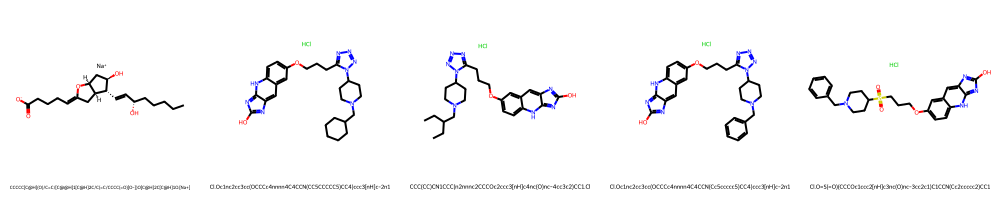

Vascular cell adhesion protein 1


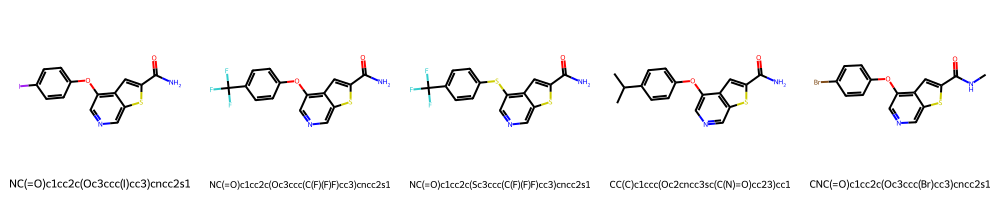

Selectin E


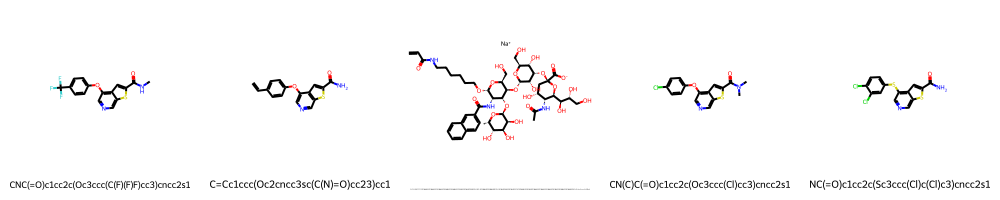

Epidermal growth factor receptor erbB1


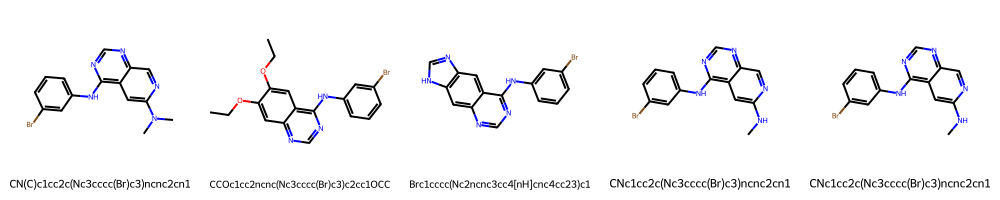

Intercellular adhesion molecule-1


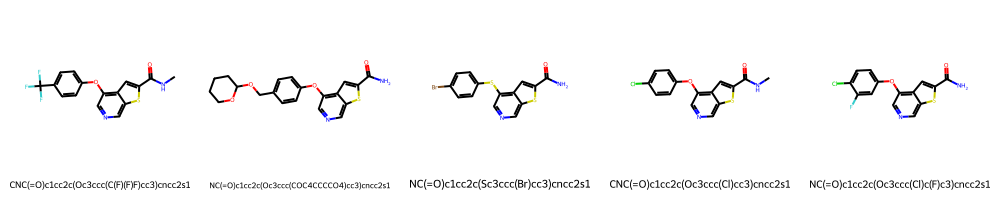

Phospholipase A2 group 1B


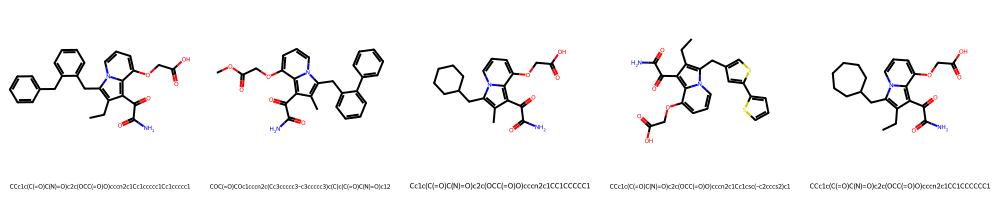

Thrombin


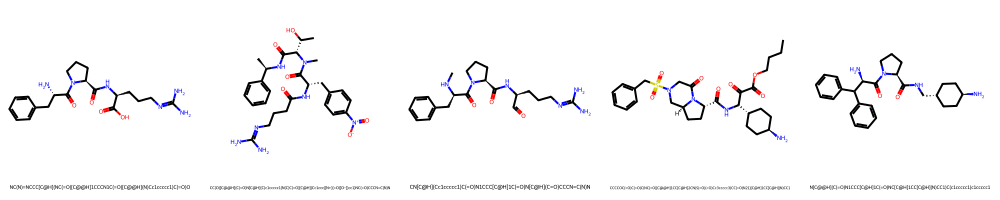

Matrix metalloproteinase 3


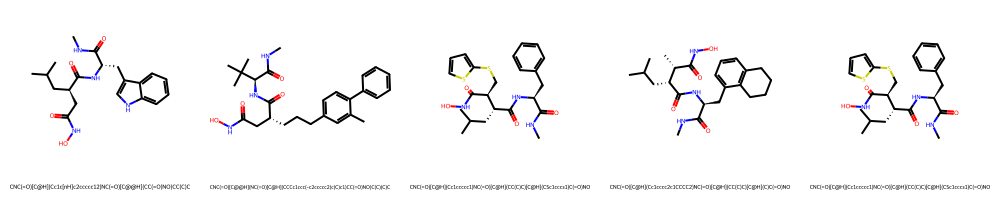

Renin


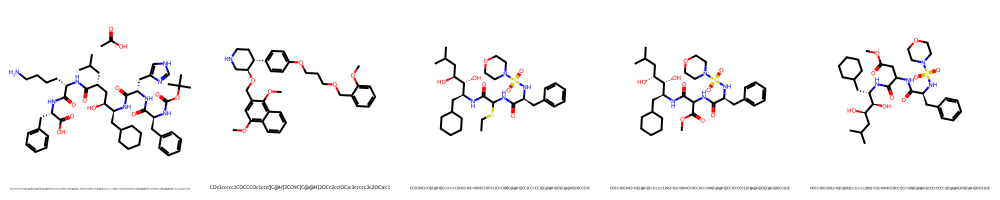

Complement C1r


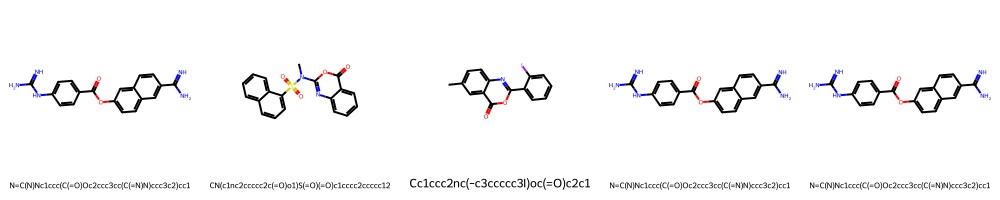

Matrix metalloproteinase-1


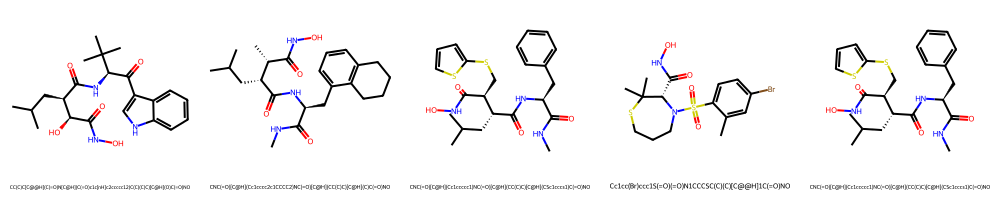

Kappa opioid receptor


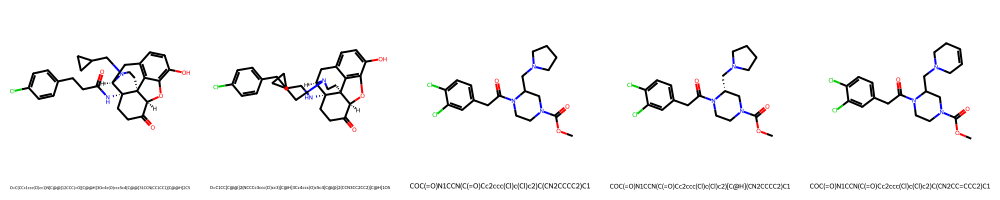

Matrix metalloproteinase 13


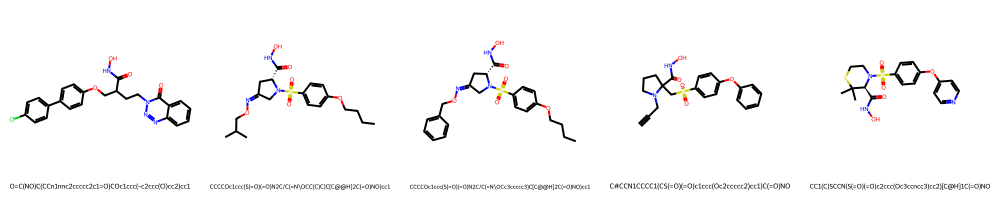

Phosphodiesterase 4


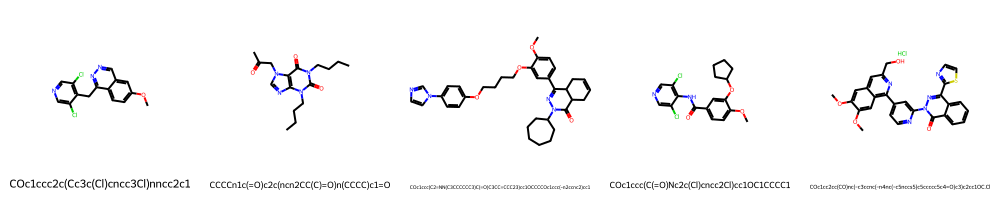

Matrix metalloproteinase-2


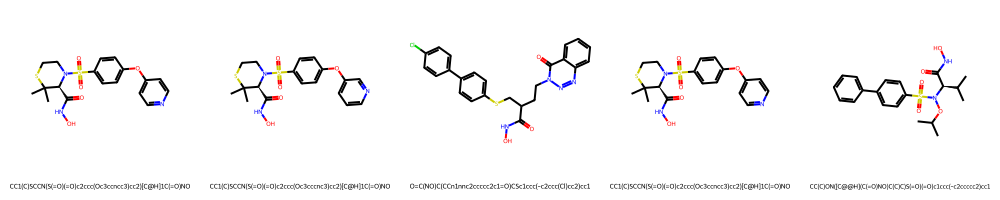

Vascular endothelial growth factor receptor 2


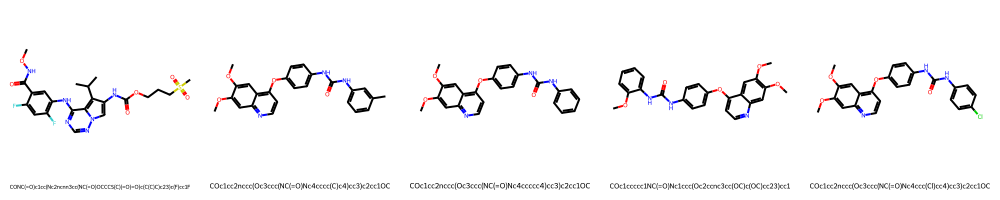

CCRF-CEM


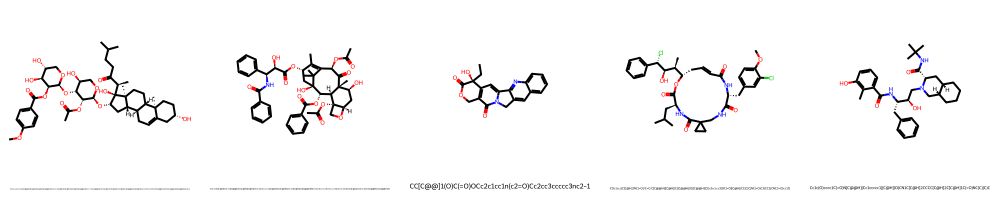

Cyclooxygenase-1


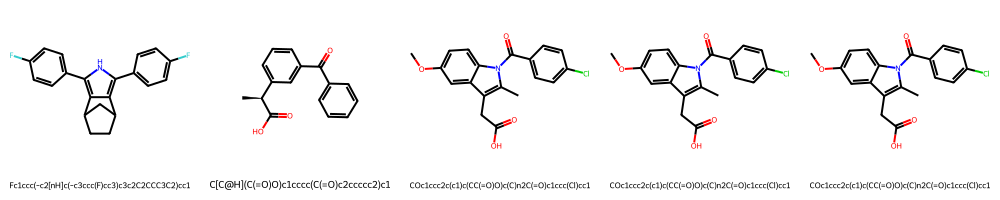

Cyclooxygenase-2


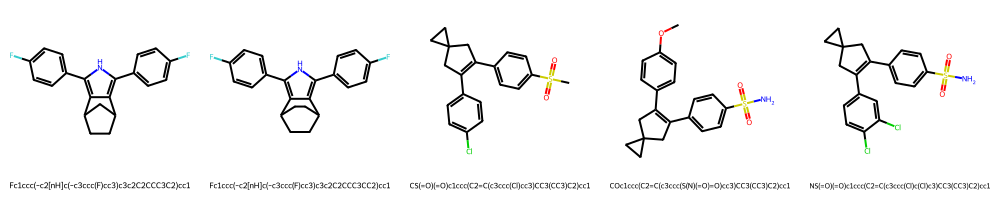

Coagulation factor X


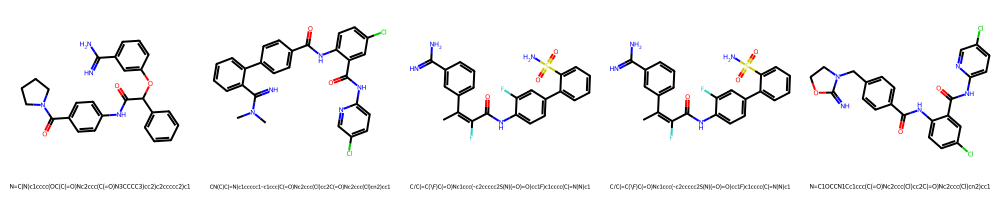

Dopamine beta-hydroxylase


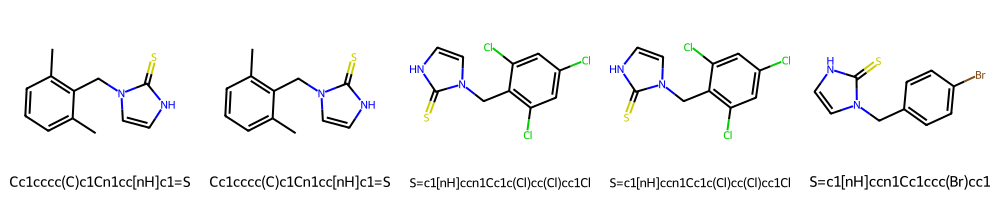

ADAM17


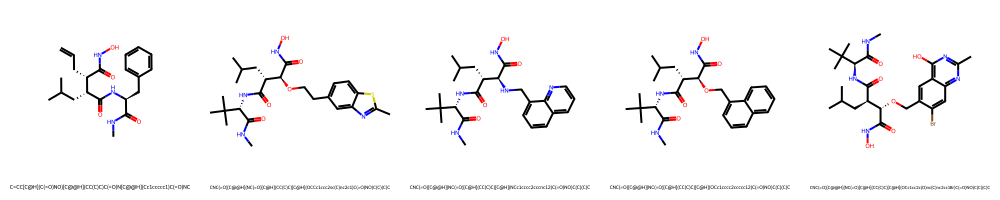

Nitric-oxide synthase, brain


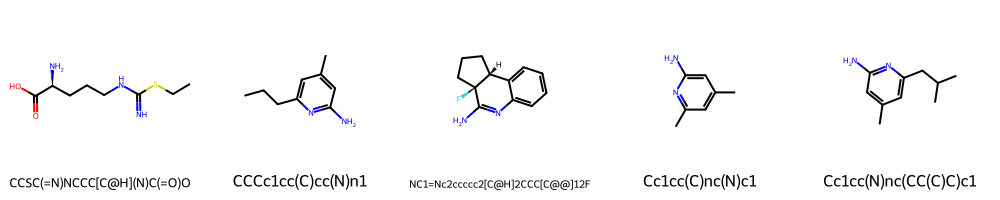

MOLT-4


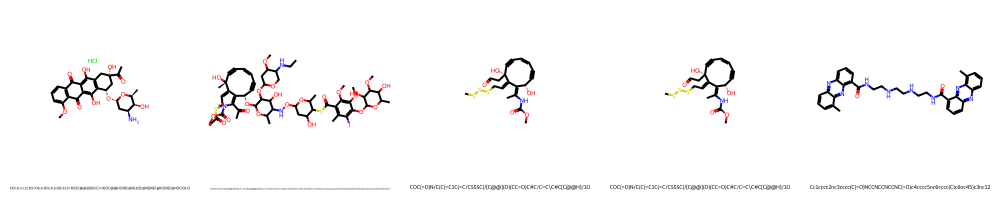

Nitric oxide synthase, inducible


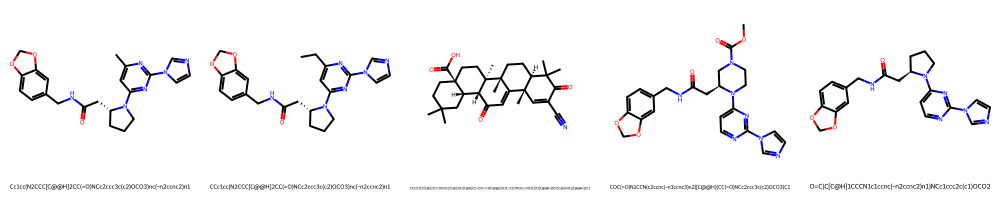

C-C chemokine receptor type 1


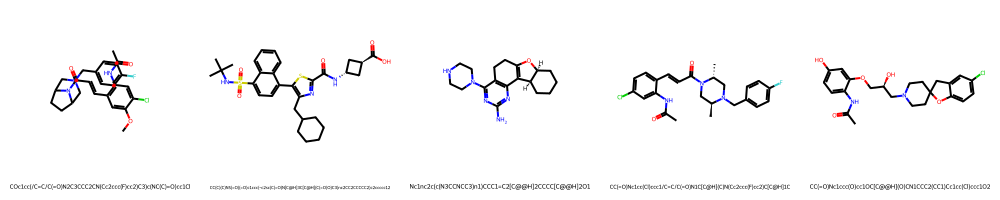

Heparanase


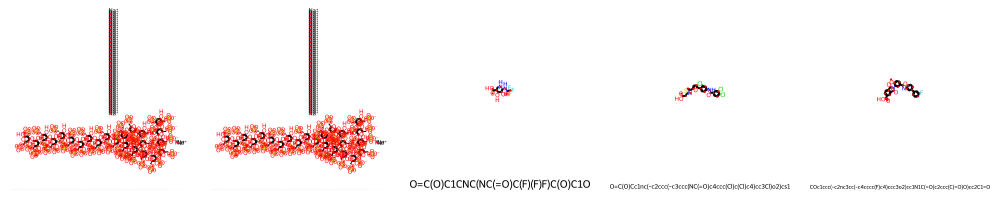

Nitric-oxide synthase, endothelial


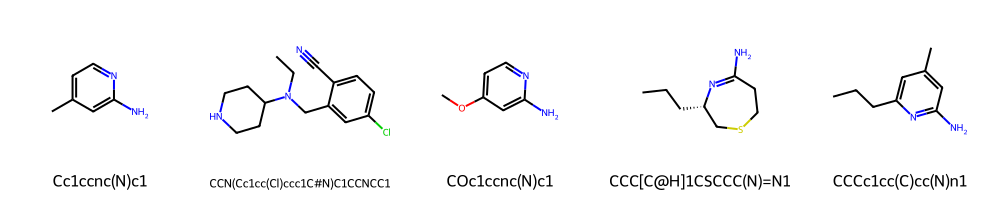

HL-60


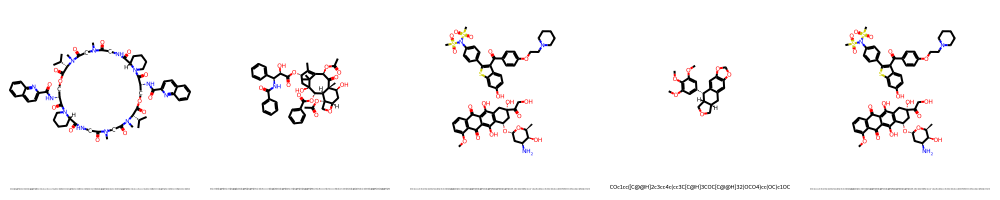

Phosphodiesterase 3


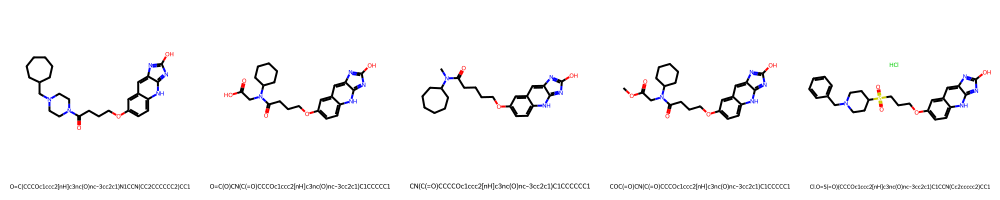

Neuropeptide Y receptor type 5


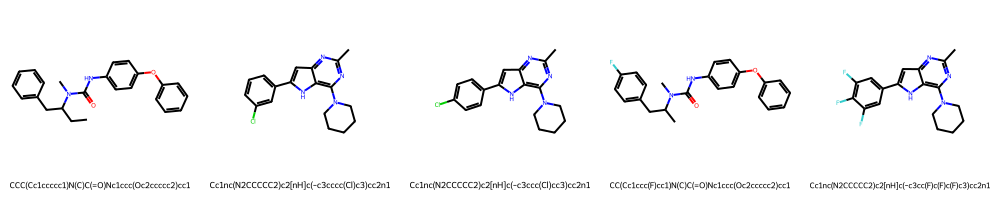

Protein-tyrosine phosphatase 1B


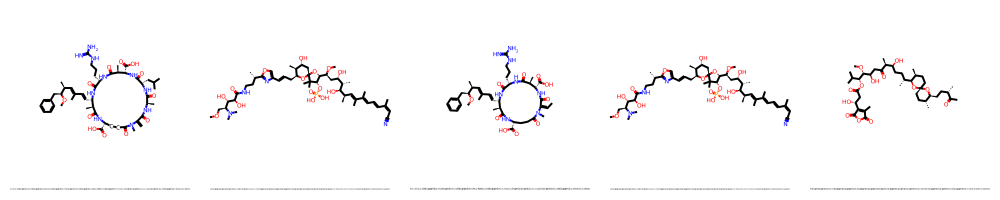

Matrix metalloproteinase 9


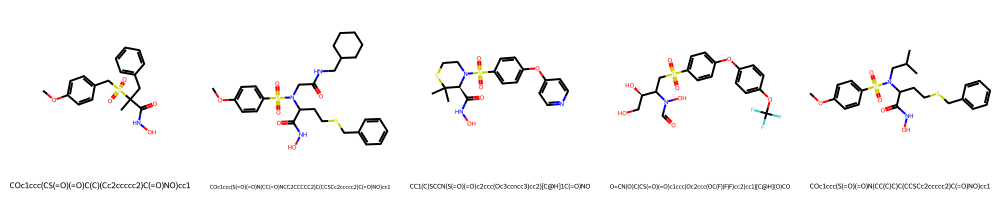

Tyrosine-protein kinase LCK


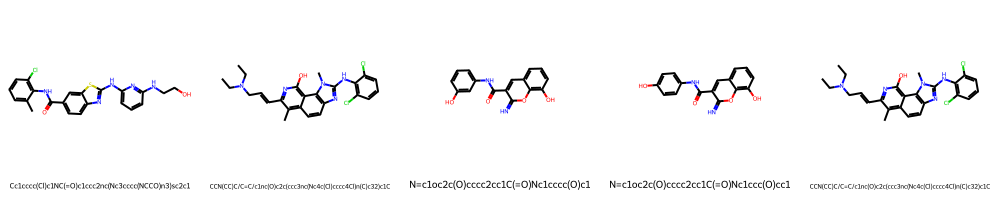

MAP kinase p38


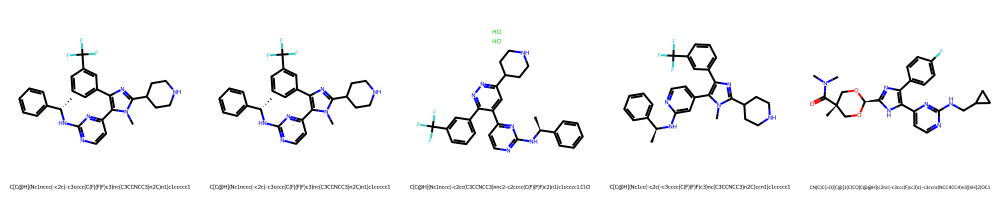

HEL


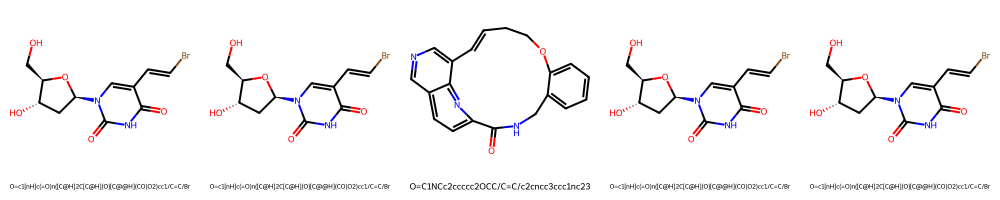

THP-1


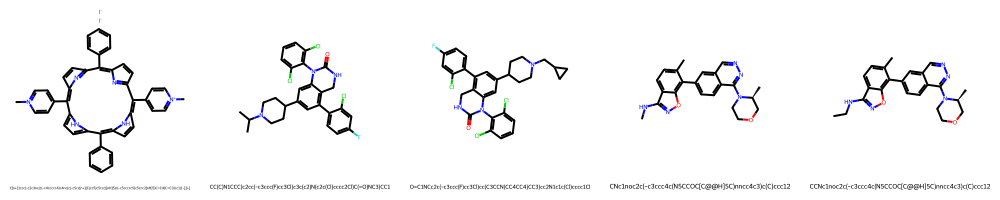

Alkaline phosphatase placental-like


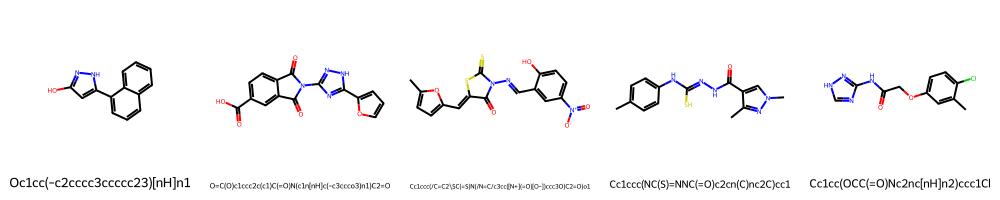

Acetylcholinesterase


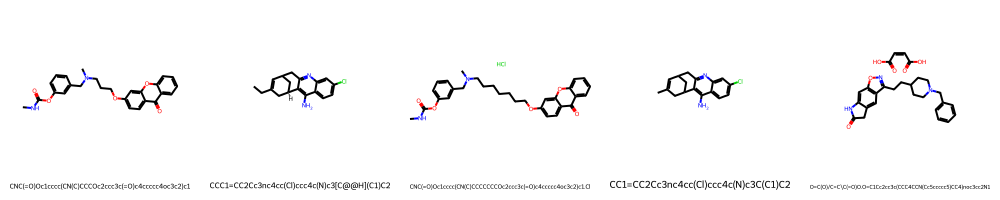

Trypsin


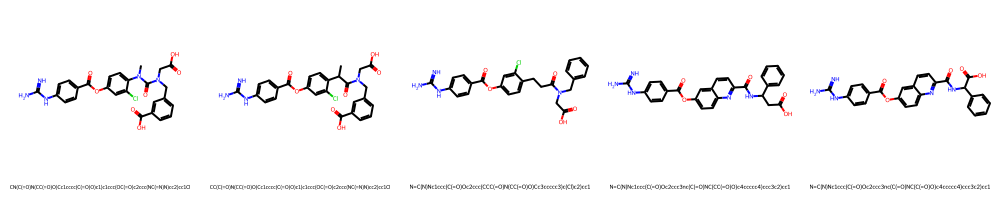

Matrix metalloproteinase 7


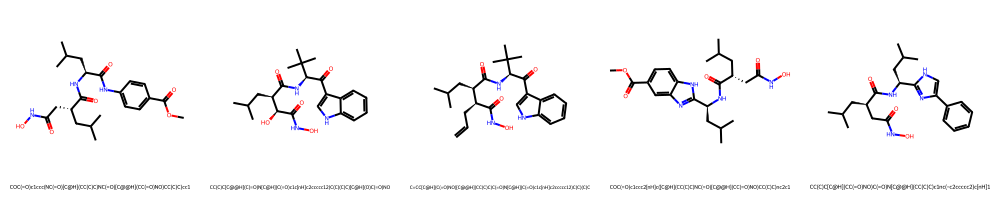

Delta opioid receptor


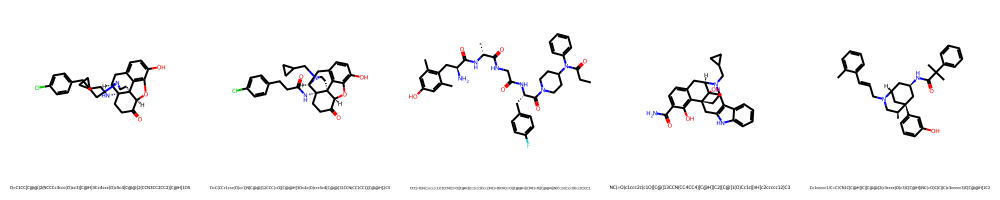

Vasopressin V2 receptor


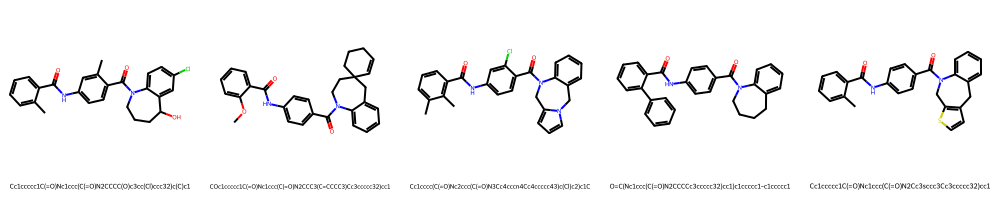

Mu opioid receptor


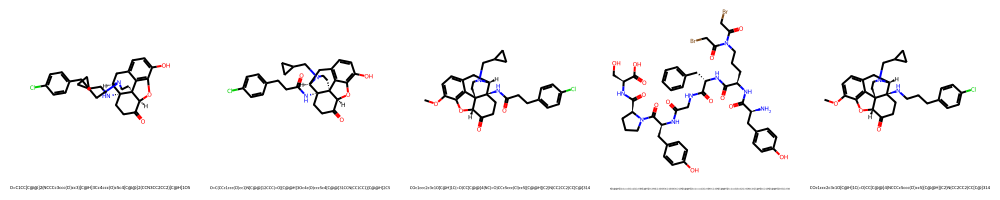

Trypsin I


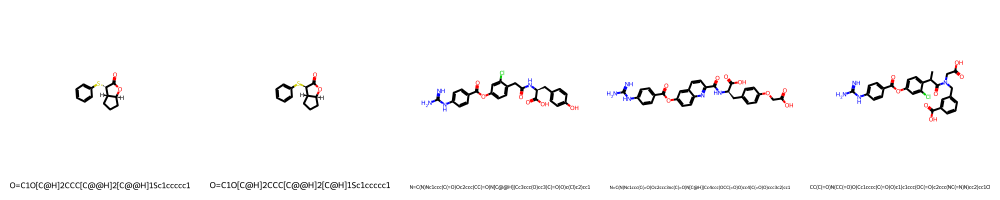

Hormone sensitive lipase


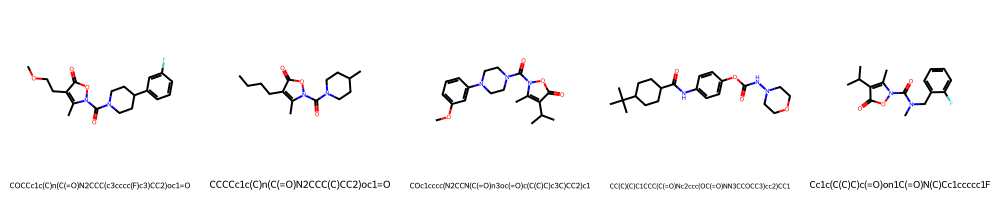

Retinoid X receptor alpha


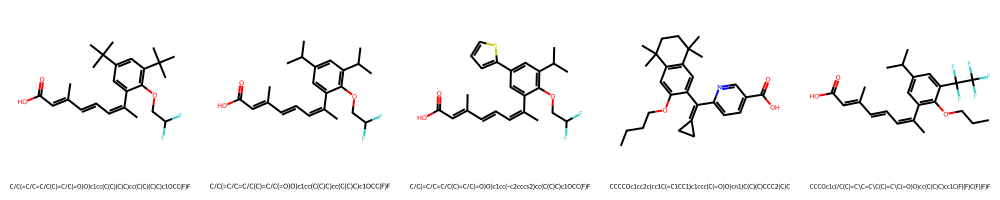

Angiotensin II type 2 (AT-2) receptor


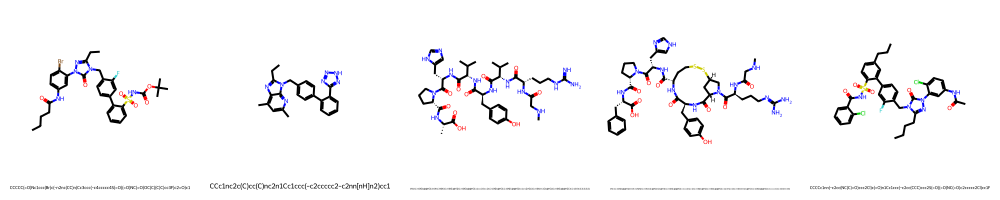

OVCAR-3


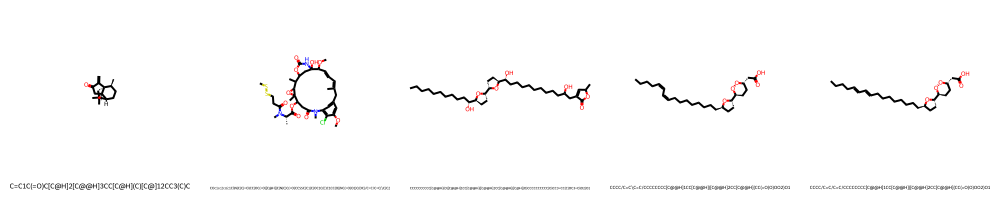

Endothelin receptor ET-B


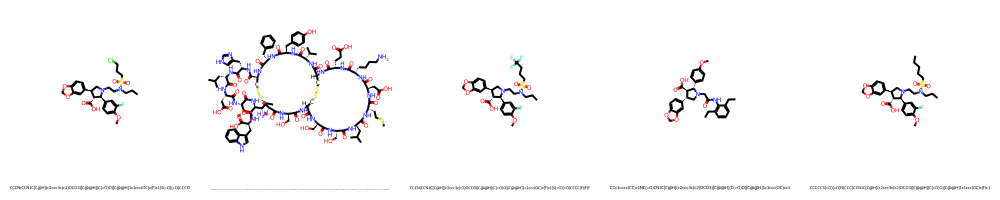

Endothelin receptor ET-A


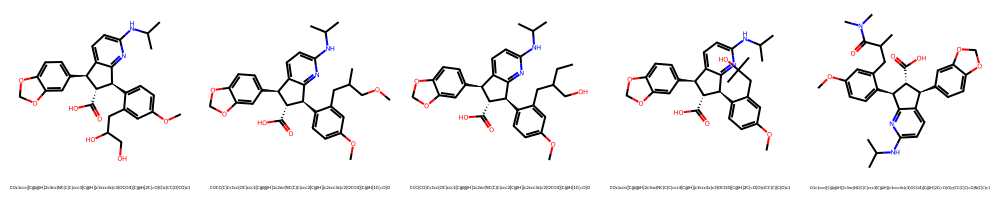

In [8]:
for key, value in df_dict.items():
    print(key)
    draw_smiles_grid(df_dict[key].sort_values(by='standard_value', ascending=True))

このコードは、**分子の SMILES 表記を ECFP4 フィンガープリントに変換し、t-SNE を用いて2次元に投影・可視化する関数 `plot_tsne(df_dict)`** を定義しています。  

---

## **📌 コードの解説**
### **1. 必要なライブラリのインポート**
```python
import plotly.express as px
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
```
- **`plotly.express`** → t-SNE 結果を **インタラクティブに可視化**
- **`rdkit.Chem`** → SMILES 文字列を **分子オブジェクトに変換**
- **`GetMorganGenerator`** → **ECFP4（Morgan フィンガープリント）を生成**
- **`TSNE`** → 高次元の分子特徴量を **2 次元に次元削減**
- **`StandardScaler`** → データを **標準化**
- **`numpy`** → 数値データを扱うためのライブラリ

---

### **2. `plot_tsne(df_dict)` 関数**
```python
def plot_tsne(df_dict):
```
- `df_dict` は、**ターゲットタンパク質ごとに取得した化合物のデータフレーム**
- `df_dict` の構造：
  ```python
  {
      "EGFR": DataFrame(化合物の情報),
      "DRD2": DataFrame(化合物の情報),
      ...
  }
  ```
- 各 DataFrame には **SMILES（分子構造の文字列表現）** が含まれる

---

### **3. ECFP4 フィンガープリントの計算**
```python
data = []
labels = []
smiles_list = []
fp_gen = GetMorganGenerator(radius=2, fpSize=1024)
```
- **データ格納用のリストを初期化**
  - `data` → **フィンガープリントの数値データ**
  - `labels` → **化合物のターゲットタンパク質**
  - `smiles_list` → **元の SMILES 文字列**
- `GetMorganGenerator(radius=2, fpSize=1024)`
  - **ECFP4 フィンガープリントを生成**
  - `radius=2` → **ECFP4（Extended Connectivity Fingerprint, radius=2）**
  - `fpSize=1024` → **1024 次元のバイナリフィンガープリント**

---

### **4. 各ターゲットタンパク質の化合物を処理**
```python
for key, df in df_dict.items():
    smiles = df["canonical_smiles"].dropna().tolist()
    for smi in smiles:
        mol = Chem.MolFromSmiles(smi)
        if mol:
            fp = np.array(fp_gen.GetFingerprint(mol))
            data.append(fp)
            labels.append(key)
            smiles_list.append(smi)
```
- `df_dict` の **各ターゲットごとにデータを処理**
- `SMILES` を取得 → `Chem.MolFromSmiles(smi)` で **RDKit の分子オブジェクトに変換**
- **ECFP4（Morgan フィンガープリント）を計算**
  - `GetFingerprint(mol)` → **バイナリ配列（1と0のリスト）を取得**
  - `np.array(fp)` → **NumPy 配列に変換**
- 各データをリスト `data`, `labels`, `smiles_list` に保存

---

### **5. データの標準化**
```python
data = np.array(data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
```
- `data`（フィンガープリントデータ）を NumPy 配列に変換
- `StandardScaler()` で **データを標準化**
  - 平均を 0、分散を 1 に調整
  - **t-SNE は距離を考慮するため、標準化が重要！**

---

### **6. t-SNE による次元削減**
```python
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data_scaled)
```
- **t-SNE を適用して 1024 次元 → 2 次元 に圧縮**
- `n_components=2` → **2D 空間にマッピング**
- `random_state=42` → **再現性を確保**

---

### **7. 結果を DataFrame に変換**
```python
tsne_df = pd.DataFrame(tsne_results, columns=["TSNE1", "TSNE2"])
tsne_df["Protein"] = labels
tsne_df["SMILES"] = smiles_list
```
- `tsne_results`（次元削減後の座標）を **Pandas DataFrame に格納**
- `"Protein"` 列に **ターゲット名**
- `"SMILES"` 列に **元の SMILES 文字列**

---

### **8. 可視化**
```python
fig = px.scatter(
    tsne_df,
    x="TSNE1", y="TSNE2",
    color="Protein",
    hover_data=["SMILES", "Protein"],
    title="t-SNE Projection of Molecules"
)
fig.show()
```
- **Plotly で散布図を描画**
- **各点の色をターゲットごとに分類**
- `hover_data=["SMILES", "Protein"]`
  - **カーソルを合わせると SMILES やタンパク質の情報を表示**
- **インタラクティブな可視化が可能！**

---

## **📌 まとめ**
✅ **SMILES → ECFP4 フィンガープリントに変換**  
✅ **t-SNE で 1024 次元 → 2 次元 に次元削減**  
✅ **Plotly を使ってターゲットごとに分子を可視化**  

🚀 **「異なるターゲットの化合物が、特徴量空間でどのように分布するか」を分析できる！**

In [9]:
import plotly.express as px
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np

def plot_tsne(df_dict):
    """
    辞書形式のデータを受け取り、SMILES を ECFP4 に変換し、t-SNE により 2 次元に投影し、可視化。

    Parameters:
        df_dict (dict): key が結合タンパク質の名前、value が SMILES を含む DataFrame
    """
    data = []
    labels = []
    smiles_list = []
    fp_gen = GetMorganGenerator(radius=2, fpSize=1024)

    for key, df in df_dict.items():
        smiles = df["canonical_smiles"].dropna().tolist()
        for smi in smiles:
            mol = Chem.MolFromSmiles(smi)
            if mol:
                fp = np.array(fp_gen.GetFingerprint(mol))
                data.append(fp)
                labels.append(key)
                smiles_list.append(smi)

    # 標準化
    data = np.array(data)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # t-SNE で次元削減
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(data_scaled)

    # DataFrame 作成
    tsne_df = pd.DataFrame(tsne_results, columns=["TSNE1", "TSNE2"])
    tsne_df["Protein"] = labels
    tsne_df["SMILES"] = smiles_list

    # 可視化
    fig = px.scatter(tsne_df, x="TSNE1", y="TSNE2", color="Protein", hover_data=["SMILES", "Protein"], title="t-SNE Projection of Molecules")
    fig.show()


In [10]:
plot_tsne(df_dict)

このコードは、**2つのターゲットタンパク質に関連する化合物群をECFP4フィンガープリントに変換し、ランダムフォレスト分類器を使用して分類モデルを構築する** 処理を行っています。分類後、モデルの精度を評価します。

---

## **📌 コードの解説**
### **1. 必要なライブラリのインポート**
```python
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
```
- **`RandomForestClassifier`** → ランダムフォレスト分類器を使用して分類モデルを構築
- **`train_test_split`** → 訓練データとテストデータを分割
- **`classification_report` と `accuracy_score`** → モデルの評価指標を計算

---

### **2. `classify_molecules(df_dict, key1, key2)` 関数**
```python
def classify_molecules(df_dict, key1, key2):
```
- **`df_dict`**: ターゲットタンパク質名をキーとし、そのターゲットに関連する化合物の **SMILES を含むデータフレーム** を値として持つ辞書
- **`key1` と `key2`**: 比較する2つのターゲットタンパク質名

---

### **3. ECFP4 フィンガープリントの生成**
```python
fp_gen = GetMorganGenerator(radius=2, fpSize=1024)
```
- **`GetMorganGenerator`** を使って **ECFP4 フィンガープリント** を生成
  - `radius=2` → **半径 2 のエクステンデッドコネクティビティフィンガープリント（ECFP4）**
  - `fpSize=1024` → **1024 ビットのバイナリフィンガープリント**

---

### **4. 化合物データの準備**
```python
data, labels = [], []
for label, key in enumerate([key1, key2]):
    df = df_dict.get(key, pd.DataFrame())
    smiles = df["canonical_smiles"].dropna().tolist()
    for smi in smiles:
        mol = Chem.MolFromSmiles(smi)
        if mol:
            fp = np.array(fp_gen.GetFingerprint(mol))
            data.append(fp)
            labels.append(label)
```
- **2つのターゲットタンパク質（`key1` と `key2`）に関連する化合物群** を処理
- `df_dict.get(key, pd.DataFrame())` で **SMILES が含まれるデータフレームを取得**
- 各 SMILES 文字列を **分子オブジェクトに変換** (`Chem.MolFromSmiles(smi)`)
- **ECFP4 フィンガープリント** を生成し、`data` に追加
- `labels` には、**`key1` は 0、`key2` は 1 のラベル**を対応させて保存

---

### **5. データの分割**
```python
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
```
- **データとラベルを 80% の訓練データと 20% のテストデータに分割**
- `test_size=0.2` → テストデータに 20% を割り当てる
- `random_state=42` → **再現性のためランダムシードを固定**

---

### **6. ランダムフォレストモデルの学習**
```python
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
```
- **`RandomForestClassifier`** を使用してランダムフォレストモデルを作成
  - `n_estimators=100` → **100 本の決定木（弱学習器）を使う**
  - `random_state=42` → 再現性を確保
- 訓練データ（`X_train`, `y_train`）でモデルを学習

---

### **7. 予測と評価**
```python
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}\t{key1} vs. {key2}")
```
- **テストデータ（`X_test`）を使って予測**
- `accuracy_score(y_test, y_pred)` で **予測精度（正確度）を計算**
  - `y_test` → 実際のラベル
  - `y_pred` → モデルの予測ラベル
- **分類精度を出力**  
  - `Accuracy: 0.92 EGFR vs. DRD2` のように、ターゲット名と精度を表示

---

## **📌 まとめ**
✅ **ECFP4 フィンガープリントに基づいて化合物の特徴量を生成**  
✅ **ランダムフォレストを用いて2つのターゲットの化合物を分類**  
✅ **分類精度（Accuracy）を評価し、結果を出力**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

def classify_molecules(df_dict, key1, key2):
    """
    2つのキーに対応する化合物群をECFP4に変換し、RandomForestで分類モデルを構築し、評価を行う。

    Parameters:
        df_dict (dict): key が結合タンパク質の名前、value が SMILES を含む DataFrame
        key1 (str): 1つ目の結合タンパク質の名前
        key2 (str): 2つ目の結合タンパク質の名前
    """
    fp_gen = GetMorganGenerator(radius=2, fpSize=1024)

    data, labels = [], []
    for label, key in enumerate([key1, key2]):
        df = df_dict.get(key, pd.DataFrame())
        smiles = df["canonical_smiles"].dropna().tolist()
        for smi in smiles:
            mol = Chem.MolFromSmiles(smi)
            if mol:
                fp = np.array(fp_gen.GetFingerprint(mol))
                data.append(fp)
                labels.append(label)

    # データ分割
    X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

    # モデル学習
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # 予測と評価
    y_pred = model.predict(X_test)
    #print("Classification Report:")
    #print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}\t{key1} vs. {key2}")


このコードは、**`df_dict` 辞書** の中から、**`Homo sapiens` 以外のターゲットタンパク質ペア** を選択し、それらのターゲットに関連する化合物群を **`classify_molecules` 関数で分類** する処理を行っています。

## **📌 コードの詳細解説**

### **1. 外側の `for` ループ（`key1` と `value`）**
```python
for key1, value in df_dict.items():
    if key1 == "Homo sapiens":
        continue
```
- **`df_dict.items()`** は、`df_dict` 辞書の各キー（ターゲットタンパク質名）と対応する値（化合物データ）を反復します。
- もし **`key1` が "Homo sapiens"** であれば、そのターゲットはスキップします（`continue`）。
  - つまり、この処理では **"Homo sapiens"** は除外されます。

### **2. 内側の `for` ループ（`key2` と `value`）**
```python
for key2, value in df_dict.items():
    if key2 == "Homo sapiens":
        continue
```
- 内側のループも同様に **`df_dict.items()`** を使って反復し、`key2` とその対応する値を処理します。
- **`key2` が "Homo sapiens"** であれば、このターゲットもスキップします。

### **3. `key1 < key2` の条件**
```python
if key1 < key2:
    classify_molecules(df_dict, key1, key2)
```
- `key1 < key2` という条件で **ターゲットの組み合わせ順序を制御** しています。
  - この条件により、例えば `key1 = "EGFR"` と `key2 = "DRD2"` といったペアが選ばれるときに、逆のペア（`key1 = "DRD2"` と `key2 = "EGFR"`）は選ばれません。
  - **同じペアが二重に処理されないようにするため**、`key1 < key2` の条件を使用して、一方向のペアのみを処理します。

- **ターゲットペアが決まったら `classify_molecules(df_dict, key1, key2)`** を呼び出して、2つのターゲットに関連する化合物の分類を行います。

---

## **📌 処理の流れ**
1. `df_dict` のすべてのターゲットタンパク質ペアを反復しますが、**"Homo sapiens"** はスキップします。
2. **同じターゲットペアを二重に分類しない**ために、`key1 < key2` の条件で順序を制御しています。
3. `classify_molecules` 関数を呼び出し、指定されたターゲットペアに対して **ランダムフォレスト分類** を実行します。

このコードは、**ターゲットタンパク質ペアごとに化合物の分類を行う** ような処理をしており、全てのターゲットペアを網羅的に処理することができます。

In [14]:
for key1, value in df_dict.items():
    if key1 == "Homo sapiens":
        continue
    for key2, value in df_dict.items():
        if key2 == "Homo sapiens":
            continue
        if key1 < key2:
            classify_molecules(df_dict, key1, key2)

Accuracy: 0.988	Vascular cell adhesion protein 1 vs. Vascular endothelial growth factor receptor 2
Accuracy: 0.992	Vascular cell adhesion protein 1 vs. Vasopressin V2 receptor
Accuracy: 0.593	Selectin E vs. Vascular cell adhesion protein 1
Accuracy: 1.000	Selectin E vs. Thrombin
Accuracy: 0.993	Selectin E vs. Vascular endothelial growth factor receptor 2
Accuracy: 0.993	Selectin E vs. Tyrosine-protein kinase LCK
Accuracy: 0.986	Selectin E vs. THP-1
Accuracy: 0.995	Selectin E vs. Trypsin
Accuracy: 0.994	Selectin E vs. Vasopressin V2 receptor
Accuracy: 1.000	Selectin E vs. Trypsin I
Accuracy: 1.000	Epidermal growth factor receptor erbB1 vs. Vascular cell adhesion protein 1
Accuracy: 0.997	Epidermal growth factor receptor erbB1 vs. Selectin E
Accuracy: 0.996	Epidermal growth factor receptor erbB1 vs. Intercellular adhesion molecule-1
Accuracy: 0.990	Epidermal growth factor receptor erbB1 vs. Phospholipase A2 group 1B
Accuracy: 0.995	Epidermal growth factor receptor erbB1 vs. Thrombin
Accu

このコードは、**指定されたターゲットタンパク質（`key`）に関連する化合物群** に対して **回帰モデル（ランダムフォレスト回帰器）** を構築し、**評価** を行うための処理を行っています。主に **`standard_value`** や **`value`** などを目的変数とし、化合物の **SMILES** を特徴量として回帰分析を実行します。

## **📌 コードの詳細解説**

### **1. 引数と前処理**
```python
if key not in df_dict:
    raise ValueError(f"Key '{key}' not found in df_dict.")
```
- `df_dict` はターゲットタンパク質名（`key`）をキーとして、対応する化合物データを含むデータフレーム（`SMILES` と目的変数）が値として格納された辞書です。
- **`key`** が `df_dict` に存在しない場合はエラーを発生させます。

```python
df = df_dict[key].dropna(subset=["canonical_smiles", "standard_value", "value"])
```
- `df` は、指定されたターゲットタンパク質に関連するデータを取得し、`SMILES`、`standard_value`、`value` のいずれかが欠損している行を削除します。

### **2. 化合物の特徴量生成（ECFP4）**
```python
fp_gen = GetMorganGenerator(radius=2, fpSize=1024)
data, target_std, target_val = [], [], []
for smi, std, val in zip(df["canonical_smiles"], df["standard_value"], df["value"]):
    mol = Chem.MolFromSmiles(smi)
    if mol:
        fp = np.array(fp_gen.GetFingerprint(mol))
        data.append(fp)
        target_std.append(float(std))
        target_val.append(float(val))
```
- **`GetMorganGenerator`** を使って、化合物の **SMILES** から **ECFP4（Extended-Connectivity Fingerprints）** を生成します。この指紋は、化合物の特徴を数値的に表現するために使用されます。
- `data` には、生成された **ECFP4特徴量**（フィンガープリント）が追加され、`target_std` と `target_val` にはそれぞれ `standard_value` と `value` が格納されます。

### **3. 目的変数（`standard_value`、`value`、およびその対数変換）**
```python
targets = {
    "standard_value": np.array(target_std),
    "value": np.array(target_val),
    "log_standard_value": np.log1p(target_std),
    "log_value": np.log1p(target_val)
}
```
- `targets` 辞書には、元の値 **`standard_value`** と **`value`** に加え、それらの **対数変換** された値（`log_standard_value` と `log_value`）も格納されます。
- `np.log1p(x)` は `log(1+x)` を計算する関数で、**対数変換** を行います。

### **4. データの前処理**
```python
data = np.array(data)
```
- 特徴量である **ECFP4フィンガープリント**（`data`）を NumPy 配列に変換します。

### **5. 回帰モデルの構築と評価**
```python
results = {}
for name, target in targets.items():
    valid_idx = np.isfinite(target)  # 有効なデータのみを使用
    X_valid = data[valid_idx]
    y_valid = target[valid_idx]
    
    X_train, X_test, y_train, y_test = train_test_split(X_valid, y_valid, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MSE": mse, "R2": r2}
```
- `targets.items()` を使って、`standard_value`、`value`、およびその対数変換に対して **回帰モデル** を構築します。
- 各目的変数（`standard_value`、`value`、`log_standard_value`、`log_value`）について：
  1. **有効なデータのみを使用**：`np.isfinite(target)` を使用して、欠損値や無効な値を除外します。
  2. `train_test_split` を使用して、データを **訓練データ（80%）** と **テストデータ（20%）** に分割します。
  3. **ランダムフォレスト回帰モデル**（`RandomForestRegressor`）を使って、訓練データで学習します。
  4. テストデータに対して予測を行い、**MSE（平均二乗誤差）** と **R2スコア** を計算します。
  
### **6. 結果の表示**
```python
print("R2 Scores: {:.3f} (standard_value)\t{:.3f} (value) \t{:.3f} (log_standard_value) \t{:.3f} (log_value)\t{}".format(
        results['standard_value']['R2'],
        results['value']['R2'],
        results['log_standard_value']['R2'],
        results['log_value']['R2'],
        key
    ))
```
- **`R2スコア`** はモデルの説明力を示し、1に近いほど良い予測ができていることを意味します。
- 各目的変数に対する **R2スコア** を表示し、ターゲットタンパク質の名前（`key`）も合わせて表示します。

---

## **📌 まとめ**
このコードは、**化合物のSMILESデータを特徴量（ECFP4フィンガープリント）に変換し、回帰モデル**（ランダムフォレスト回帰）を構築することで、**化合物の`standard_value`、`value`、およびその対数変換** に基づいて予測を行います。モデルの性能は **R2スコア** と **MSE** を用いて評価され、予測精度が表示されます。

In [15]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score

def regress_molecules(df_dict, key):
    """
    指定された結合タンパク質の化合物のSMILESをECFP4に変換し、
    standard_value, value, log(standard_value), log(value) に対する回帰モデルを構築し、評価を行う。

    Parameters:
        df_dict (dict): key が結合タンパク質の名前、value が SMILES・目的変数を含む DataFrame
        key (str): 対象の結合タンパク質の名前
    """
    if key not in df_dict:
        raise ValueError(f"Key '{key}' not found in df_dict.")

    df = df_dict[key].dropna(subset=["canonical_smiles", "standard_value", "value"])

    fp_gen = GetMorganGenerator(radius=2, fpSize=1024)

    data, target_std, target_val = [], [], []
    for smi, std, val in zip(df["canonical_smiles"], df["standard_value"], df["value"]):
        mol = Chem.MolFromSmiles(smi)
        if mol:
            fp = np.array(fp_gen.GetFingerprint(mol))
            data.append(fp)
            target_std.append(float(std))
            target_val.append(float(val))

    # 目的変数リスト（NaNや無効値を除外）
    targets = {
        "standard_value": np.array(target_std),
        "value": np.array(target_val),
        "log_standard_value": np.log1p(target_std),
        "log_value": np.log1p(target_val)
    }

    # 特徴量をNumPy配列に変換
    data = np.array(data)

    # 各目的変数に対して回帰モデルを構築
    results = {}
    for name, target in targets.items():
        valid_idx = np.isfinite(target)  # 有効なデータのみを使用
        X_valid = data[valid_idx]
        y_valid = target[valid_idx]

        X_train, X_test, y_train, y_test = train_test_split(X_valid, y_valid, test_size=0.2, random_state=42)

        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {"MSE": mse, "R2": r2}

    # 結果表示
    print("R2 Scores: {:.3f} (standard_value)\t{:.3f} (value) \t{:.3f} (log_standard_value) \t{:.3f} (log_value)\t{}".format(
            results['standard_value']['R2'],
            results['value']['R2'],
            results['log_standard_value']['R2'],
            results['log_value']['R2'],
            key
        ))

このコードは、**`df_dict` の各キー（ターゲットタンパク質名）に対して `regress_molecules` 関数を実行**する処理です。

## **コードの詳細な解説**

### **1. `df_dict.items()` の反復処理**
```python
for key, value in df_dict.items():
```
- **`df_dict`** は、ターゲットタンパク質名をキーとして、対応する化合物データを含むデータフレームが値として格納された辞書です。
- **`df_dict.items()`** は、辞書のすべてのキーと値を反復処理します。ここでは、`key` はターゲットタンパク質名（例えば、`"Homo sapiens"` など）を表し、`value` は対応するデータフレームを指します。

### **2. `regress_molecules` 関数の呼び出し**
```python
regress_molecules(df_dict, key)
```
- **`regress_molecules`** 関数は、指定されたターゲットタンパク質に関連する化合物の **SMILES** データを基に回帰分析を行います。
- `df_dict` は辞書全体であり、`key` は現在のターゲットタンパク質名です。`regress_molecules` 関数に渡され、指定されたターゲットに関連する化合物の **ECFP4 フィンガープリント** を特徴量として、回帰モデル（ランダムフォレスト回帰）を構築し、`standard_value` や `value` の予測を行います。

### **3. 結果の表示**
`regress_molecules` 関数内で予測の結果が計算され、最終的に **R2 スコア** や **MSE**（平均二乗誤差）が表示されます。これにより、ターゲットタンパク質ごとに **回帰分析の評価結果** が出力されます。

## **まとめ**
このコードは、`df_dict` 内のすべてのターゲットタンパク質に対して **回帰モデル**（ランダムフォレスト回帰）を適用し、化合物の **`standard_value`** や **`value`** に基づいた予測精度を評価しています。それぞれのターゲットについて **R2スコア** を計算し、モデルの性能を確認しています。

In [16]:
for key, value in df_dict.items():
    regress_molecules(df_dict, key)

R2 Scores: 0.215 (standard_value)	-0.091 (value) 	0.698 (log_standard_value) 	0.596 (log_value)	Homo sapiens
R2 Scores: 0.216 (standard_value)	-0.037 (value) 	0.560 (log_standard_value) 	0.568 (log_value)	Vascular cell adhesion protein 1
R2 Scores: 0.929 (standard_value)	-0.074 (value) 	0.889 (log_standard_value) 	0.433 (log_value)	Selectin E
R2 Scores: -0.157 (standard_value)	0.123 (value) 	0.656 (log_standard_value) 	0.488 (log_value)	Epidermal growth factor receptor erbB1
R2 Scores: -66.154 (standard_value)	-0.651 (value) 	-0.093 (log_standard_value) 	0.636 (log_value)	Intercellular adhesion molecule-1
R2 Scores: 0.792 (standard_value)	0.395 (value) 	0.838 (log_standard_value) 	0.668 (log_value)	Phospholipase A2 group 1B
R2 Scores: 0.874 (standard_value)	0.545 (value) 	0.710 (log_standard_value) 	0.713 (log_value)	Thrombin
R2 Scores: 0.113 (standard_value)	-1.074 (value) 	0.668 (log_standard_value) 	0.601 (log_value)	Matrix metalloproteinase 3
R2 Scores: 0.174 (standard_value)	-2.45

<ipython-input-15-bf3fe0219cf3>:34: RuntimeWarning:

invalid value encountered in log1p



R2 Scores: -0.115 (standard_value)	-3.161 (value) 	0.613 (log_standard_value) 	0.511 (log_value)	Matrix metalloproteinase 13


<ipython-input-15-bf3fe0219cf3>:34: RuntimeWarning:

invalid value encountered in log1p



R2 Scores: -0.355 (standard_value)	-0.586 (value) 	0.760 (log_standard_value) 	0.486 (log_value)	Phosphodiesterase 4
R2 Scores: -0.017 (standard_value)	0.709 (value) 	0.662 (log_standard_value) 	0.650 (log_value)	Matrix metalloproteinase-2
R2 Scores: 0.144 (standard_value)	0.011 (value) 	0.573 (log_standard_value) 	0.510 (log_value)	Vascular endothelial growth factor receptor 2
R2 Scores: 0.476 (standard_value)	-1.826 (value) 	0.666 (log_standard_value) 	0.518 (log_value)	CCRF-CEM
R2 Scores: -0.006 (standard_value)	-0.009 (value) 	0.484 (log_standard_value) 	0.579 (log_value)	Cyclooxygenase-1
R2 Scores: 0.296 (standard_value)	0.271 (value) 	0.641 (log_standard_value) 	0.384 (log_value)	Cyclooxygenase-2
R2 Scores: 0.203 (standard_value)	0.349 (value) 	0.645 (log_standard_value) 	0.536 (log_value)	Coagulation factor X
R2 Scores: 0.886 (standard_value)	-145905.615 (value) 	0.886 (log_standard_value) 	0.458 (log_value)	Dopamine beta-hydroxylase
R2 Scores: -0.166 (standard_value)	-0.323 (va

<ipython-input-15-bf3fe0219cf3>:34: RuntimeWarning:

invalid value encountered in log1p



R2 Scores: 0.263 (standard_value)	0.282 (value) 	0.794 (log_standard_value) 	0.571 (log_value)	Phosphodiesterase 3
R2 Scores: 0.469 (standard_value)	0.236 (value) 	0.433 (log_standard_value) 	0.385 (log_value)	Neuropeptide Y receptor type 5


<ipython-input-15-bf3fe0219cf3>:34: RuntimeWarning:

divide by zero encountered in log1p

<ipython-input-15-bf3fe0219cf3>:34: RuntimeWarning:

invalid value encountered in log1p



R2 Scores: -1.070 (standard_value)	-2.631 (value) 	0.106 (log_standard_value) 	0.723 (log_value)	Protein-tyrosine phosphatase 1B
R2 Scores: 0.403 (standard_value)	0.662 (value) 	0.693 (log_standard_value) 	0.643 (log_value)	Matrix metalloproteinase 9


<ipython-input-15-bf3fe0219cf3>:34: RuntimeWarning:

invalid value encountered in log1p



R2 Scores: 0.642 (standard_value)	0.198 (value) 	0.778 (log_standard_value) 	0.796 (log_value)	Tyrosine-protein kinase LCK
R2 Scores: -0.075 (standard_value)	-0.009 (value) 	0.545 (log_standard_value) 	0.409 (log_value)	MAP kinase p38
R2 Scores: -13805.415 (standard_value)	-5156.708 (value) 	0.662 (log_standard_value) 	0.407 (log_value)	HEL


<ipython-input-15-bf3fe0219cf3>:34: RuntimeWarning:

invalid value encountered in log1p



R2 Scores: 0.745 (standard_value)	0.437 (value) 	0.698 (log_standard_value) 	0.727 (log_value)	THP-1
R2 Scores: 0.792 (standard_value)	0.442 (value) 	0.523 (log_standard_value) 	0.436 (log_value)	Alkaline phosphatase placental-like


<ipython-input-15-bf3fe0219cf3>:34: RuntimeWarning:

invalid value encountered in log1p



R2 Scores: 0.260 (standard_value)	0.031 (value) 	0.686 (log_standard_value) 	0.352 (log_value)	Acetylcholinesterase
R2 Scores: 0.102 (standard_value)	-0.009 (value) 	0.801 (log_standard_value) 	0.788 (log_value)	Trypsin
R2 Scores: 0.356 (standard_value)	0.093 (value) 	0.758 (log_standard_value) 	0.390 (log_value)	Matrix metalloproteinase 7


<ipython-input-15-bf3fe0219cf3>:34: RuntimeWarning:

invalid value encountered in log1p



R2 Scores: -1.039 (standard_value)	-0.953 (value) 	0.801 (log_standard_value) 	0.795 (log_value)	Delta opioid receptor
R2 Scores: 0.831 (standard_value)	-522.981 (value) 	0.723 (log_standard_value) 	0.752 (log_value)	Vasopressin V2 receptor
R2 Scores: 0.806 (standard_value)	0.183 (value) 	0.605 (log_standard_value) 	0.698 (log_value)	Mu opioid receptor
R2 Scores: 0.476 (standard_value)	0.404 (value) 	0.842 (log_standard_value) 	0.798 (log_value)	Trypsin I
R2 Scores: -201.107 (standard_value)	0.025 (value) 	0.213 (log_standard_value) 	0.574 (log_value)	Hormone sensitive lipase
R2 Scores: 0.561 (standard_value)	0.069 (value) 	0.837 (log_standard_value) 	0.617 (log_value)	Retinoid X receptor alpha
R2 Scores: -0.596 (standard_value)	-0.569 (value) 	0.599 (log_standard_value) 	0.609 (log_value)	Angiotensin II type 2 (AT-2) receptor
R2 Scores: -0.003 (standard_value)	0.052 (value) 	0.501 (log_standard_value) 	0.579 (log_value)	OVCAR-3
R2 Scores: 0.543 (standard_value)	0.390 (value) 	0.743 (l

これまでのコードは、化学情報と機械学習を用いて、化合物の構造に基づく予測や分類、回帰分析を行うための一連のプロセスです。以下に主要な流れとその内容をまとめます。

---

### **1. 必要なライブラリのインポート**
- **`chembl-webresource-client`**: ChEMBLデータベースから化合物情報を取得するためのクライアント。
- **`rdkit`**: SMILES表記を分子構造に変換し、指紋（フィンガープリント）を生成するためのライブラリ。
- **`sklearn`**: 機械学習のためのライブラリ。特に分類、回帰、次元削減（t-SNE）などのモデルを使用。
- **`plotly.express`**: 可視化ツール。

---

### **2. ChEMBLからデータを取得**
```python
activity = new_client.activity
```
- **ChEMBL API**を使用して、ターゲットとなる生物（例えばヒト `Homo sapiens`）に関連する化合物データを収集します。特に、IC50（半数最大抑制濃度）などの活性情報を取得し、DataFrame形式で処理します。

---

### **3. ターゲットの頻度解析**
```python
target_counts = df["target_chembl_id"].value_counts()
```
- 取得したデータから、**ターゲットタンパク質**の頻度を計算し、最も多くの関連化合物を持つターゲットタンパク質を特定します。

---

### **4. SMILESから分子構造の描画**
```python
draw_smiles_grid(df)
```
- SMILES表記を基に、化合物の分子構造を **RDKit** を使って描画します。描画はグリッド形式で、特定の数（例: 5つ）の化合物の構造を並べて表示します。

---

### **5. t-SNEによる次元削減と可視化**
```python
plot_tsne(df_dict)
```
- **SMILES表記から生成した分子指紋（ECFP4）** を用いて、**t-SNE** を用いて次元削減し、化合物を2次元空間にプロットします。これにより、化学構造に基づく類似性が視覚的に確認できます。

---

### **6. 分類問題（RandomForestを使用）**
```python
classify_molecules(df_dict, key1, key2)
```
- **RandomForestClassifier** を使用して、異なるターゲットタンパク質（例: `key1` と `key2`）に関連する化合物を **2クラス分類** します。
- ECFP4指紋を特徴量として使用し、ランダムフォレストモデルを訓練し、モデルの精度を評価します。

---

### **7. 回帰問題（RandomForestRegressorを使用）**
```python
regress_molecules(df_dict, key)
```
- **RandomForestRegressor** を使用して、**標準値（IC50など）やその対数変換** を予測する回帰モデルを構築します。
- ターゲットタンパク質ごとに、化合物のSMILESデータを **ECFP4指紋** に変換し、回帰分析を行い、**R2スコア** や **MSE** を計算してモデルの精度を評価します。

---

### **8. 複数ターゲットタンパク質での回帰・分類**
```python
for key1, key2 in combinations(df_dict.keys(), 2):
    classify_molecules(df_dict, key1, key2)
```
- 複数のターゲットタンパク質に対して、回帰や分類を一括で実行し、それぞれのターゲットに対する分析を行います。

---

### **総合的なフロー**
1. **ChEMBLデータの取得**: ターゲットタンパク質に関連する化合物データ（SMILES、活性値など）を取得。
2. **データ前処理**: 取得したデータをクリーンアップし、必要な特徴量（SMILES）を準備。
3. **可視化**: SMILESを分子構造に変換し、化合物の可視化を行う。
4. **次元削減と可視化**: t-SNEを使用して化合物を2次元空間にプロット。
5. **機械学習モデル**: ランダムフォレストを用いて分類や回帰モデルを構築し、ターゲットごとの評価を行う。

---

### **全体の目的**
このコードは、化学物質の **分類** と **回帰分析** を行うためのフレームワークを提供しており、特に化学的構造情報（SMILES）を使って、化合物がターゲットタンパク質に与える影響を予測することを目的としています。